<h1>House Price Prediction</h1>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1.05em";>Abstract</span></h1>


<span  style=" font-family: sans-serif; font-size: 1.07em";>
**House Prices: Advanced Regression Techniques **  

Kaggle has launched this competition with a dataset containing 79 explanatory variables, that describes almost every aspect of residential homes in Ames, Iowa. The target of this problem is to predict the house's sale price. We have performed a number of challenging tasks such as handling missing values and hyperparameter tuning while solving this problem. We have performed comparatively easier data visualization tasks such as correlational matrix or scatter plot, as it was the target of the competition. We have tried to provide a solution rigorous and robust enough so that the procedures followed here can be applied to similar problems in the future. Our complete solution consists of the following steps:  Exploratory Data Analysis, Data Preprocessing, Feature Construction & Selection and, finally, Model building with fine-tuning of the Hyperparameters.</span>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1em";>Purpose of project </span></h1>

<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  <li>The Kaggle Competition House Prices: Advanced Regression Techniques requires us to predict sale price of a house situated in Ames, Iowa. We have been provided with two datasets with various information regarding the houses like living area in square feet, house location, house and basement's condition, etc. </li>
  <li>Necessary and Important tasks required for this project :
    <ol>
      <li>Wrangling, cleaning and preprocessing the data for modeling.</li>
      <li>Detecting outliers</li>
      <li>Fine tuning Hyper Parameters</li>
      <li>Training different models and evaluating their performance.</li>
    </ol></li>
</span></ul>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1em";>Our Approach</span></h1>

Solving Machine Learning Problems needs not only building Machine Learning Models but also rigorous data analysis. We need to be familiar with different features and their effect and influence on our target variable before building models. So keeping this in mind, we have catagorized our problem solving approach to following steps :

<ul>
	<dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 1 : Dataset Loading in our environment</span></dt> 
	<dd>Before everything else we first need to collect the data and load it into our working environment.</dd>
	<dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 2 : Exploratory Data Analysis</span></dt>
	<dd> In this Section we will completely and rigorously explore our dataset and watch and gain knowledge on different features as much as possible. Which features of a House actually dominates its Sale Price we will know here. We will also see which features are fluctuating too much or which tends to be correlated with other features.</dd>
	<dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 3 : Data Preprocessing</span></dt>
	<dd> Here we will handle missing cases. We will see are they really missing or this missing means anything else. We will fill up the missing values with our domain knowledge on features gained from previous step.</dd>
	<dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 4 : Feature Construction</span></dt>
	<dd>After we have dealt with missing cases, now we will see if it is possible to introduce some new features into our Dataset.</dd>
	<dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 5 : Feature Selection</span></dt>
	<dd> If we have too much feature It will put strain on our model and our model will try to overfit. So we nee to take a subset of features from all features. We will select 0 best Features to train model.</dd>
	<dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 6 : ANN Model Building</span></dt>
	<dd> And Here comes our last but not least step. We have done all steps above to prepare Dataset for this step. Here we will do mainly following three works:
		<ol>
			<li>Hyperparameter Tuning</li>
			<li>Grid Search Method</li>
			<li>Bayesian Optimization</li>
			<li>Grid Search VS Bayesian Optimization</li>
            <li>ANN model building with tuned Hyper Parameters</li>
		</ol>
	</dd>
    <dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 7 : Ensembling</span></dt>
    <dd>Here we have ensembled and stacked multiple models together to build a more generalized model.</dd>
    <dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 8 : Residual Modeling</span></dt>
    <dd>Residual between Actual SalePrice and Predicted SalePrice can be used to build a residual model which will increase previous model's accuracy.</dd>
    <dt><span  style="color: #D35400; font-family: sans-serif; font-size: 1em";> Ch 9 : CNN Model Building</span></dt>
    <dd>We have build a Convolutional Neural Network Model here.</dd>
</ul>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
import warnings
import math
from collections import OrderedDict
import pickle
import random
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor,LinearRegression
import time
from sklearn.externals import joblib
from sklearn import preprocessing

np.random.seed(42)


warnings.filterwarnings('ignore')



In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D
from keras.optimizers import SGD
from keras.initializers import random_uniform
from keras.wrappers.scikit_learn import KerasRegressor

from math import sqrt

Using TensorFlow backend.


In [3]:
from keras.layers.advanced_activations import LeakyReLU

In [4]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

<h2><span  style="color: #7E57C2; font-family: sans-serif; font-size: 1em";>Ch 1 : Dataset Loading in our environment</span></h2>
<ul><span  style="color: #455818; font-family: sans-serif; font-size: 1em";>
<li>We have used Pandas Dataframe to load our Dataset as it will help use to visualize and analysis the Dataset easily.</li>
<li> We will see the shape of Dataset.</li>
<li> Train has 81 columns and 1460 rows</li>
<li> Test has 80 columns and 1460 rows</li>
<li>Train set include target variable but test does not include that variable as for test set we have to predict that variable. That's why Train set has an extra column.</li>
</span></ul>
<h3><span  style="color: #184558; font-family: sans-serif; font-size: 1em";>Features list :</span></h3>

<span  style=" color: #182558;font-family: sans-serif; font-size: 1em";>From Data Desciption provided by kaggle, Here we are providing definitions of some features:</span>
<ol><span  style="color: #581845; font-family: sans-serif; font-size: 1em";>
<li><dt>SalePrice</dt> <dd>the property's sale price in dollars. This is the target variable that we are trying to predict.</dd></li> </li>
<li><dt>MSSubClass</dt> <dd>The building class. It includes values like 20, 30, 40, 45 etc. </dd></li>
<li><dt>MSZoning</dt> <dd>The general zoning classification. it indicates whether the building is in agricultural, commercial or in industrial zone.</dd></li>
<li><dt>BldgType</dt> <dd>Type of dwelling,. For which type of family the building is suitable for : single family or two family.</dd></li>
<li><dt>OverallQual</dt> <dd>Rates the overall material and finish of the house</dd></li>
<li><dt>OverallCond</dt> <dd>Rates the overall condition of the house. rtaing value ranges from 1 to 10 where 1 stands for very poor quality and 10 stands fro very excellent quality.</dd></li>
<li><dt>Street</dt> <dd>Type of road access to the property. Is the street paved or gravel ?</dd></li>
<li><dt>Alley</dt> <dd>Type of alley access. Is there any type of alley which can be used to enter the property ? If there is , what is it's type ? Paved or Gravel ?</dd></li>
<li><dt>LotShape</dt>  <dd>General shape of property. Does it have regular shape or irregular shape ? If irregular , what is the extent fo irregularity ? Slightly , moderately ?</dd></li>
<li><dt>LandContour</dt>  <dd>Flatness of the property</dd></li>
<li><dt>LotFrontage</dt>  <dd>Linear feet of street connected to property</dd></li>
<li><dt>YearBuilt</dt> <dd>Original construction date</dd></li>

<li><dt>YearRemodAdd</dt> <dd>Remodel date (same as construction date if no remodeling or additions)</dd></li>

<li><dt>RoofStyle</dt> <dd>Type of roof : Flat, Gable, Gabrel, Hip, Mansard or Shed</dd></li>
<li><dt>Utilities</dt>  <dd>Type of utilities available</dd></li>
<li><dt>LotConfig</dt>  <dd>Lot configuration</dd></li>
<li><dt>LotArea</dt>  <dd>Lot size in square feet</dd></li>
<li><dt>HouseStyle</dt> <dd> Is the building 1 story , 2story or 1 and half story ?</dd></li>
<li><dt>BsmtQual</dt><dd>Indicates teh height of basement. Depending on height, there are 6 types of basement ( Excellent, Good, Typical, Fair, Poor and No Basement )</dd></li>
<li><dt>BsmtCond</dt><dd>Evaluates the general condition of the basement.</dd></li>
<li><dt>TotalBsmtSF</dt><dd>Total area of basement in square feet.</dd></li>
<li><dt>GrLivArea</dt><dd>Total living area above ground in square feet.</dd></li>
<li><dt>GarageType</dt><dd>Where is the garage ? Is it attached to home or in basement or detached from home ?</dd></li>
<li><dt>PoolArea</dt><dd>Pool area in square feet.</dd></li>
<li><dt>WoodDeckSF</dt><dd>Wood deck area in square feet.</dd></li>
</span></ol>

In [5]:
train_df = pd.read_csv("train.csv")
train_df.rename(columns={'1stFlrSF':'FstFlrSF','2ndFlrSF':'SndFlrSF'}, inplace = True)

test_df = pd.read_csv("test.csv")
test_df.rename(columns={'1stFlrSF':'FstFlrSF','2ndFlrSF':'SndFlrSF'}, inplace = True)



In [6]:
# lets see the features our dataset contains
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1em";>Ch 2 : Exploratory Data Analysis</span></h2>
<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.1 Statistics Summary of Features</h3>
<ul><span  style="font-family: sans-serif; font-size: 1em";>
<li>From statistics summary of features, we can average value for Every features and this gives us the knowdlege of their value range.</li>
</ul>
<h4><span  style="color: #455818; font-family: sans-serif; font-size: 1em";>Our deduction on some features:</span></h4>
<ol><span  style=" font-family: sans-serif; font-size: 1em";>
<li><dt>LotFrontage</dt> <dd>Even though LotFrontage has a maximum value of 313 feet, 75% of data points have LotFrontage less than or equal 80 feet.</dd></li>
<li><dt>YearBuilt</dt> <dd>50% of the houses have been built before or at 1973. 50% of the houses are quite old. </dd></li>
<li><dt>MasVnrArea, WoodDeckSF</dt> <dd>50% houses have no Masonry veneer or wood deck.</dd>
<li><dt>PoolArea</dt> <dd>Maximum Pool Area among houses of obeservations is 738 square  feet but 75% of houses do not have any Pool. </dd></li>
</spane></ol>

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.2 Statistics Summary of Sale Price ( Target Variable )</h3>
<ul><span  style="font-family: sans-serif; font-size: 1em";>
<li>From statistics summary of Sale Price , we can see that behavior of Sale Price .</li>
</ul>
<h4><span  style="color: #455818; font-family: sans-serif; font-size: 1em";>Our deduction on target variable:</span></h4>
<ol><span  style=" font-family: sans-serif; font-size: 1em";>
<li>Average SalePrice is 180K.</li>
<li>Most of the houses have SalePrice between 130k and 214K.</li>
</span></ol>

In [8]:
# lets see the behavior of our target variable
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.3 Distribution of Sale Price ( Target Variable )</h3>
<ol><span  style=" font-family: sans-serif; font-size: 1em";>
<li>We have tried to fit 3 different types of distribution to target variable SalePrice.</li>
<li>Different distribution types are : 
	<ul>
		<li>Normal Distribution.</li>
		<li>Gamma Distribution.</li>
		<li>Gilbrat Distribution.</li>
	</ul>
</li>
<li>Histogram plot verifies that though we have tried to fit differemt type of distribution to SalePrice, DIstribution of SalePrice actually and mostly follows Normal DIstribution.</li>
<li>Distribution of SalePrice shows positive skewness.</li>
</span></ol>

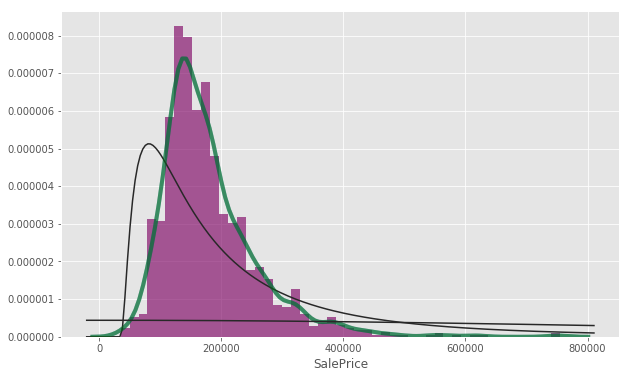

In [9]:
#Lets see SalePrice's histogram
sns.set_color_codes("dark")
sns.distplot(train_df['SalePrice'],fit=stats.gilbrat,color='r', kde_kws={"color":"c","lw":4,"alpha":0.5});
sns.distplot(train_df['SalePrice'],fit=stats.gamma,color='m', kde_kws={"color":"g","lw":4,"alpha":0.5});


<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
  <li>SalePrice's Distribution is showing positive skewness.</li>
  <li>SalePrice's Distribution has some peakedness too.</li>
  <li>As the distribution plot is showing skewness, we can observe the mathematical amount of this skewness</li>
</span></ul>

In [10]:

print("Skewness: ", train_df['SalePrice'].skew())
print("Kurtosis: ", train_df['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.4 List of numerical and categorical variables</h3>
<p> We need to find out which features are numerical and which are categorical as our model won,t be able to deal with categorical variables.</p>
<p>We have seen that following features and many others are numerical features.</p>
<ul>
<li>OverallQual</li>  <li>OverallCond</li>  <li>TotalBsmtSF</li>  <li>FstFlrSF etc.</li>     
</ul>
<p>We have seen that following features and many others are categorical features.</p>
<ul>
<li>HeatingQC</li>  <li>BsmtQual</li>  <li>PoolQC</li>  <li>GarageFin etc.</li>     
</ul>

In [11]:
# lets sort out catagorical and numerical features

cols = train_df.columns
num_cols = list(train_df._get_numeric_data().columns.values)

# lets remove ID as it is not a feature actually
num_cols.remove('Id')
num_cols.remove('SalePrice')
print('''
              ......Numerical Variables.......
''')
print("{:<12} {:<10} {:<2}\n".format('Var name', 'Mean', 'Std'))

for var in num_cols:
    print("{:<12} {:<10} {:<2}\n".format(var, round(train_df[var].mean(),3), round(train_df[var].std(),3)))



              ......Numerical Variables.......

Var name     Mean       Std

MSSubClass   56.897     42.301

LotFrontage  70.05      24.285

LotArea      10516.828  9981.265

OverallQual  6.099      1.383

OverallCond  5.575      1.113

YearBuilt    1971.268   30.203

YearRemodAdd 1984.866   20.645

MasVnrArea   103.685    181.066

BsmtFinSF1   443.64     456.098

BsmtFinSF2   46.549     161.319

BsmtUnfSF    567.24     441.867

TotalBsmtSF  1057.429   438.705

FstFlrSF     1162.627   386.588

SndFlrSF     346.992    436.528

LowQualFinSF 5.845      48.623

GrLivArea    1515.464   525.48

BsmtFullBath 0.425      0.519

BsmtHalfBath 0.058      0.239

FullBath     1.565      0.551

HalfBath     0.383      0.503

BedroomAbvGr 2.866      0.816

KitchenAbvGr 1.047      0.22

TotRmsAbvGrd 6.518      1.625

Fireplaces   0.613      0.645

GarageYrBlt  1978.506   24.69

GarageCars   1.767      0.747

GarageArea   472.98     213.805

WoodDeckSF   94.245     125.339

OpenPorchSF  46.66      66.2

In [12]:
cat_cols = list(set(cols) - set(num_cols))

# lets remove ID as it is not a feature actually
cat_cols.remove('Id')
cat_cols.remove('SalePrice')
print('''
              ......Categorical Variables.......
''')
train_df[cat_cols].describe()


              ......Categorical Variables.......



,BsmtFinType1,Heating,BldgType,Functional,GarageFinish,KitchenQual,ExterQual,LotShape,Exterior2nd,HeatingQC,...,BsmtQual,HouseStyle,Exterior1st,MSZoning,BsmtFinType2,Condition2,RoofMatl,CentralAir,FireplaceQu,SaleCondition
count,1423,1460,1460,1460,1379,1460,1460,1460,1460,1460,...,1423,1460,1460,1460,1422,1460,1460,1460,770,1460
unique,6,6,5,7,3,4,4,4,16,5,...,4,8,15,5,6,8,8,2,5,6
top,Unf,GasA,1Fam,Typ,Unf,TA,TA,Reg,VinylSd,Ex,...,TA,1Story,VinylSd,RL,Unf,Norm,CompShg,Y,Gd,Normal
freq,430,1428,1220,1360,605,735,906,925,504,741,...,649,726,515,1151,1256,1445,1434,1365,380,1198


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 2.5 Dependence on Numerical Features</h3>
<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";> Scatter plot</span></h4>

<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
  <li>We have ploted scatter plot for features against target variable SalePrice to see the effect of features on SalePrice.</li>
  <li>While plotting, for every different features scatter plot is plotted seperately.</li>
  <li>While creating scatter plot of Feature VS SalePrice scatter plot, we have plotted feature value along X axis and SalePrice along Y axis.</li>
  <li>Linear relation means that one variable increases, the other also increases. From Our observations following Features shows strong relationship with Sale Price :
<ul>
  <li>OverallQual</li>
  <li>GrLivArea</li>
  <li>GarageArea</li>
  <li>TotalBsmtSF</li>
  <li>YearBuilt</li>
  <li>LotFrontage</li>
  <li>LotArea</li>
  <li>MasVnrArea</li>
  <li>BsmtFinSF1</li>
  <li>TotalBsmtSF</li>
  <li>FstFlrSF</li>

</ul></li>
</span></ul>
<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.05em";> Why scatter plot ?</span></h4>


<span  style=" font-family: sans-serif; font-size: 1.05em";>

We can only see correlation matrix to detect the effect of different features on target variable SalePrice. However, we have plotted scatter plot for several reasons:</span>
<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
  <li>Correlation matrix only capture Linear relation ship between features and target variable. If any feature has ** non-linear ** relationship with  target variable Correlation Matrix would not be able to capture that.</li>
  <li>From our observation we can say that **TotalBsmtSF** has more **exponential** relation than **linear ** relation with SalePrice.</li>
  <li>Previous Statement applies for LotArea too. **LotArea** has more **exponential** relation than **linear ** relation with SalePrice.</li>
</span></ul>

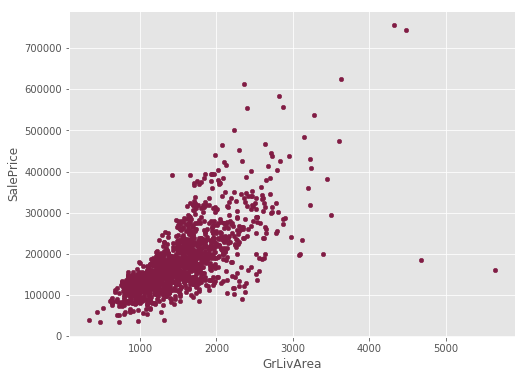

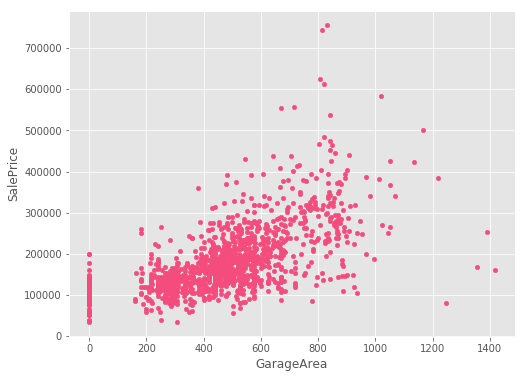

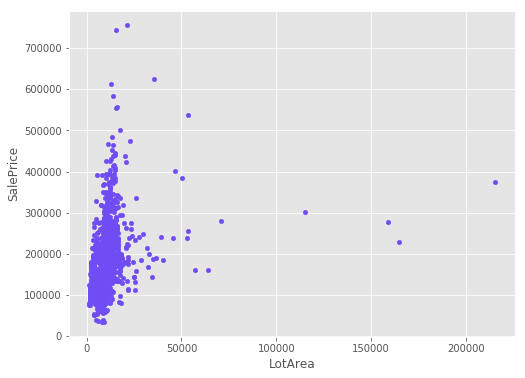

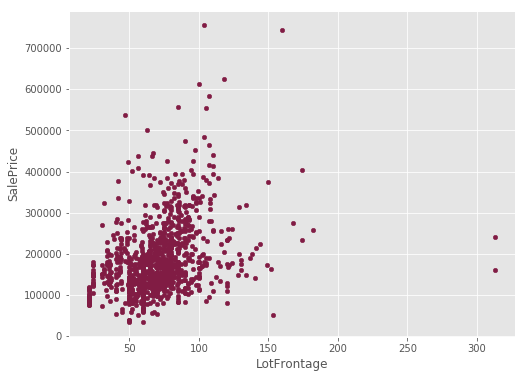

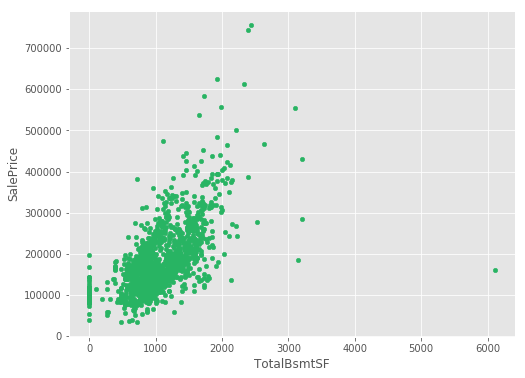

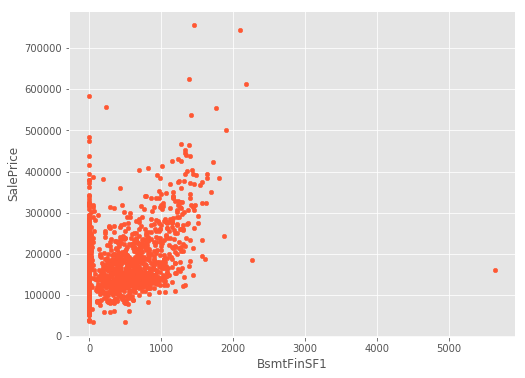

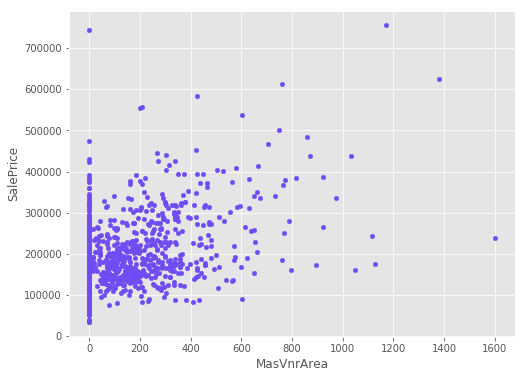

In [13]:
### ............. Lets see some Data visualization..................
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_color_codes('muted')
colors = ['#CD5C5C','#DC7633','#28B463','#F44C7C','#704CF4','#6B811C','#811C44','#FF5733']
for x in ['GrLivArea','GarageArea', 'LotArea', 'LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1','MasVnrArea']:
    plot = train_df.plot(kind="scatter", x=x, y="SalePrice",color=colors[np.random.randint(0,8)])

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.05em";> Box plot </span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
  <li>Boxplot is a method for graphically depicting groups of numerical data through their Interquartile range. Boxplot have been drawn for features :
    <ol>
      <li>OverallQual</li>
      <li>GarageCars</li>
      <li>FullBath</li>
      <li>TotRmsAbvGrd</li>
        <li>YeraBuilt</li>
    </ol></li>
    <li>SalePrice drops as the YearBuilt moves toward left side. Actually It means SalePrice drops as the House seems older.</li>
    <li>SalePrice increases with increase in OverallQual. It means Houses with good quality ranking have higher SalePrice. </li>
</span></ul>

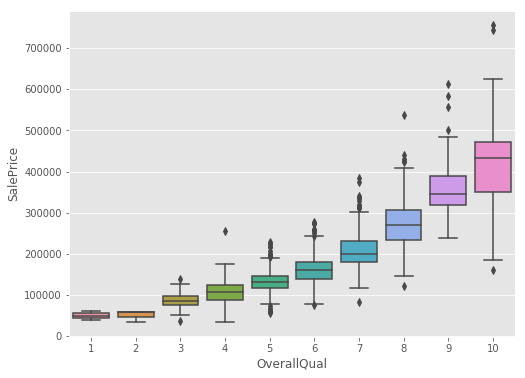

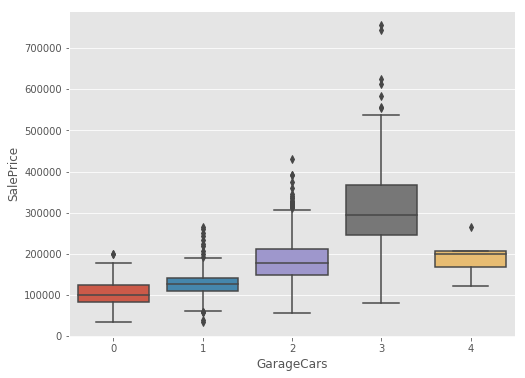

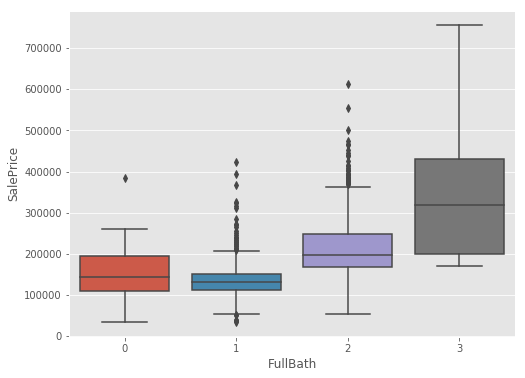

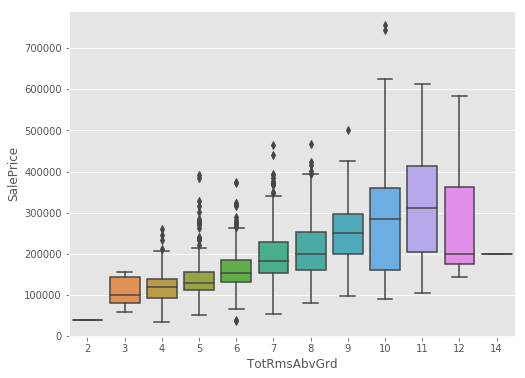

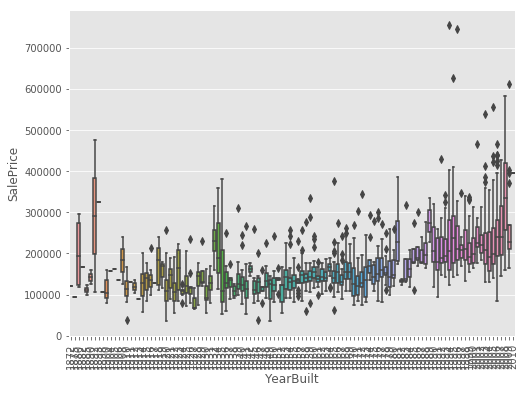

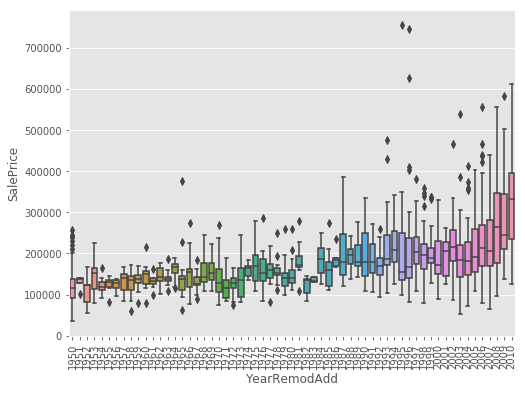

In [14]:
## We will only see boxplots of highly influencial variables

influencial_cols = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']


for var in influencial_cols:
    data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
    sns.boxplot(x=var,y='SalePrice', data=data);
    if var in ['YearBuilt','YearRemodAdd']:
        plt.xticks(rotation=90);
    plt.show();

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>Strip plot</span></h4>
<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  <li>We have plotted Strip plot for Neighborhood which is a categorical variable/feature. Strip plot is just like scatter plots we have drawn before . The only difference is that ordering along horizontal axis is arbitary. Here we have used alphabetical ordering.</li>
  <li>From Strip plot it is evident that different neighborhood has different Sale Price and there is good amount of variation in Sale Price among neighborhoods.</li>
</span></ul>


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

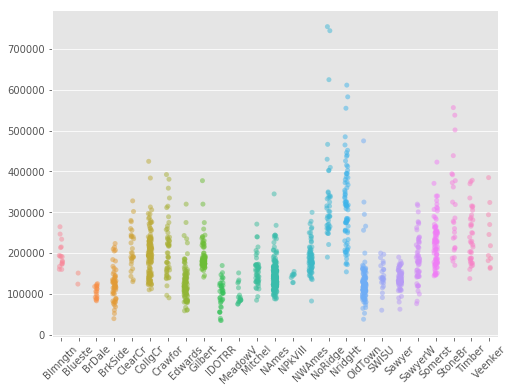

In [16]:
sns.stripplot(x = train_df.Neighborhood.values, y = train_df.SalePrice.values,
              order = np.sort(train_df.Neighborhood.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>Point plot</span></h4>
<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  <li> We have sorted different Neighborhoods using median Sale Price and the result have shown using a Point plot.</li>
</span></ul>

In [18]:
Neighborhood_meanSalePrice = train_df.groupby('Neighborhood')['SalePrice'].mean()
 
Neighborhood_meanSalePrice = Neighborhood_meanSalePrice.sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

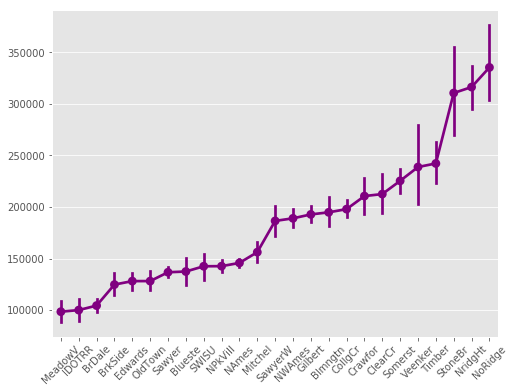

In [22]:
sns.pointplot(x = train_df.Neighborhood.values, y = train_df.SalePrice.values,
              order = Neighborhood_meanSalePrice.index,color='purple')
 
plt.xticks(rotation=45)


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.6 Correlation Matrix</h3>
	<p> We have drawn two correlational matrix.</p>
	<ul>
		<li> First One show correlation betweeen every pair of Features including Sale Price </li>
		<li> SEcond one shows strongly related Features wth Sale Price in a Descending order</li>
	</ul>
	<p> From Correlational Matrix following Features shows strong relationship with Sale Price :</p>
<ul>
	<li>OverallQual</li>
	<li>GrLivArea</li>
	<li>GarageArea</li>
	<li>GarageCars</li>
	<li>TotalBsmtSF</li>
	<li>FstFlrSF</li>
	<li>FullBath</li>
	<li>YearBuilt</li>

</ul>
<p> This varifies our observation from previous steps.</p>

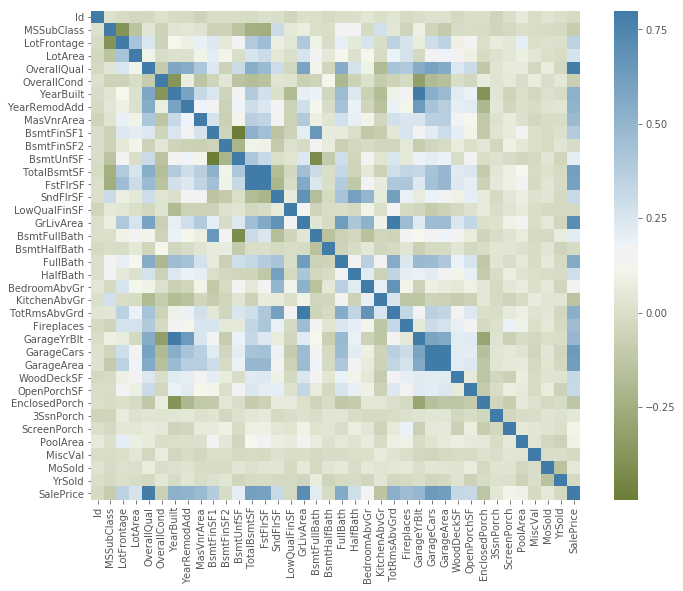

In [14]:
#correlation matrix
corr_mat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True,cmap=sns.diverging_palette(100, 240,as_cmap=True));

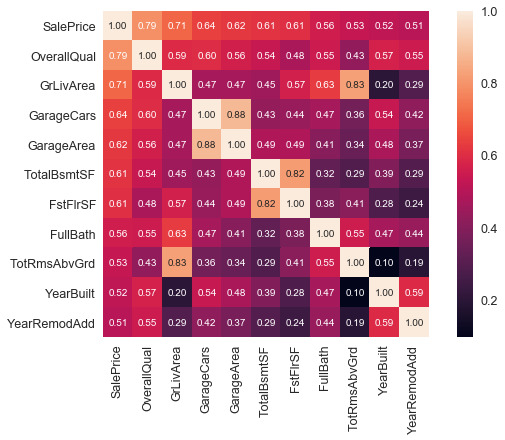

In [15]:
#saleprice correlation matrix
k = 11 
cols_k = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols_k].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_k.values, xticklabels=cols_k.values);


<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";> Pair plot </span></h4>
<span  style=" font-family: sans-serif; font-size: 1.05em";> We have drawn pair plot for some highly influencial features to see their pair wise relation.</span>

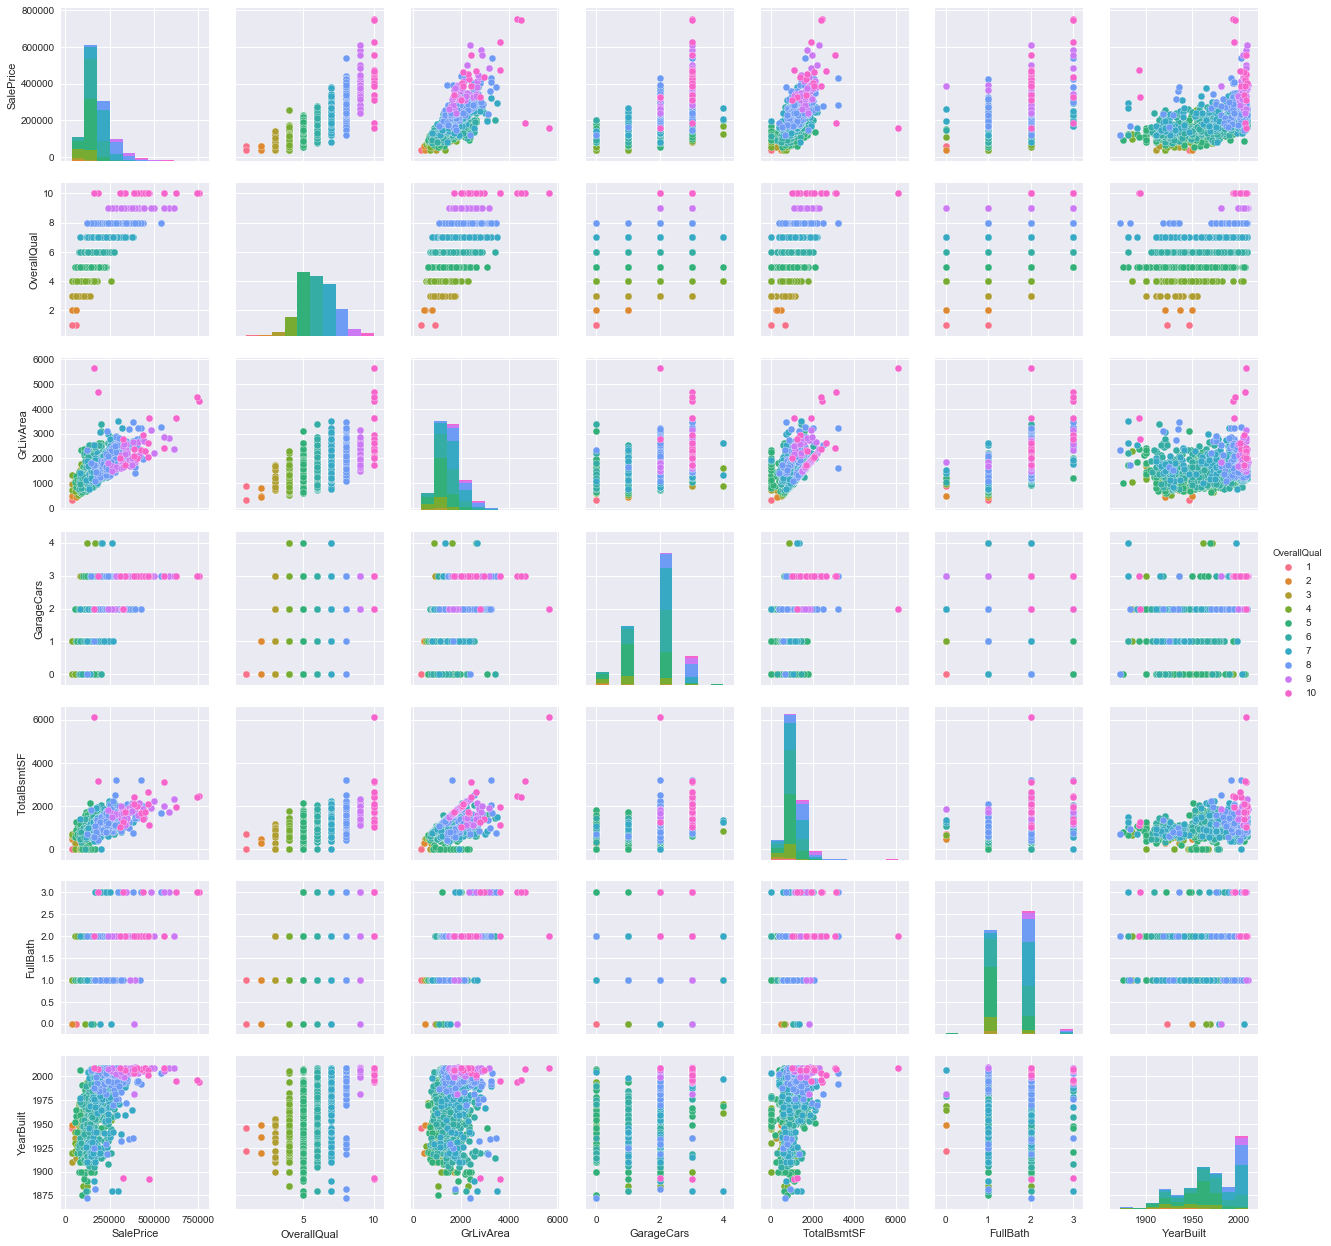

In [17]:
#pairplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5, hue='OverallQual')
plt.show();

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.7 Principle Component Analysis</h3>

<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. It's common technique to reduce dimension which makes it easy to visualize higher dimension data points in lower 2D/3D co-ordinate system.</li>
  <li>We have used PCA to reduce our data points which have 80 dimension or features to represent with only 3 dimension.</li>
  <li>After plotting datapoints using 3 principle component, we could not find any conspicuous patterns in data.</li>
    <li>PCA analysis shows the Data variance along different axis.According to our analysis :
	<ul>
		<li>1st PCA axis alone covers above **80%** of Data Variance.</li>
		<li>1st and 2nd PCA axis can cover around 90% of Data Variance.</li>
	</ul></li>
    </span></ul>

In [18]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [50]:
# Keep the SalePrice column appart as it is our target variable

df = train_df.drop('SalePrice', axis=1)
X = df[influencial_cols].values 

# Run The PCA
pca = PCA(n_components=6)
pca.fit(X)
 
# Store results of PCA in a data frame
columns = ['PCA%i' % i for i in range(6)]
result_df=pd.DataFrame(pca.transform(X), columns=columns, index=df.index)
my_color = result_df['PCA0']

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca_variance_ratio = pca.explained_variance_ratio_

In [44]:
print('{:<5}  {:<5}\n'.format('PC', 'Variance ratio'))
for i in range(len(pca_variance_ratio)):
    pc = 'PC%i'%i
    print('{:<5}  {:<5}'.format(pc,round(pca_variance_ratio[i],5)))

PC     Variance ratio

PC0    0.82794
PC1    0.16886
PC2    0.00224
PC3    0.00064
PC4    0.00022
PC5    0.00011


<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.05em";> Scatter plot for 3 Principle Components</span></h4>

We have created a 3D scatter plot taking three main principle components. To show a better view of the plot we have created 20 plots of the scatter plot and using Image magick attached them and made a GIF file. Next we have used IPDisplay to show the GIF figure.

In [45]:
%%capture
# We are going to do 20 plots, for 20 different angles

for angle in range(70,210,2):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.gca( projection='3d')
    ax.scatter(result_df['PCA0'], result_df['PCA1'], result_df['PCA2'],c=my_color, cmap="Set1_r", s=60)

    # axis lines through space:
    xAxisLine = ((min(result_df['PCA0']), max(result_df['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'm')
    yAxisLine = ((0, 0), (min(result_df['PCA1']), max(result_df['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')
    zAxisLine = ((0, 0), (0,0), (min(result_df['PCA2']), max(result_df['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA on the House price data set")
    
    # Set the angle of the camera
    ax.view_init(30,angle)
    
    # Save it
    filename='pca_capture'+str(angle)+'.png'
    plt.savefig(filename, dpi=96);
    plt.gca();
    


In [107]:
import IPython.display as IPdisplay

IPdisplay.Image(url='PCA.gif')

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 2.8 Linear Discriminant Analysis</h3>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step. The goal is to project a dataset onto a lower-dimensional space and find patterns in data.</li>
    <li>LDA just like PCA analysis shows the Data variance along different axis but using Clustering appproach.</li>
  <li>We could not find any conspicuous patterns in data after LDA.</li>
    <li>According to our analysis :
	<ul>
		<li>1st LDA axis alone covers around 66% of Data Variance</li>
		<li>To cover around 90% of Data Variance, we need around 4-5 LDA Axises.</li>
	</ul></li>

</ul>

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
y = train_df['SalePrice']
# Run The LDA
lda = LinearDiscriminantAnalysis(n_components=6)
lda.fit(X,y)
 
# Store results of PCA in a data frame
columns = ['LDA%i' % i for i in range(6)]
result_df=pd.DataFrame(lda.transform(X), columns=columns, index=df.index)
my_color = result_df['LDA0']

LinearDiscriminantAnalysis(n_components=6, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [55]:
lda_variance_ratio = lda.explained_variance_ratio_

In [56]:
print('{:<5}  {:<5}\n'.format('LDA', 'Variance ratio'))
for i in range(len(pca_variance_ratio)):
    pc = 'LD%i'%i
    print('{:<5}  {:<5}'.format(pc,round(lda_variance_ratio[i],5)))

LDA    Variance ratio

LD0    0.65565
LD1    0.09045
LD2    0.07605
LD3    0.06719
LD4    0.05758
LD5    0.05306


<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.05em";> Scatter plot for 3 LDA Components</span></h4>

We have created a 3D scatter plot taking three main LDA components. To show a better view of the plot we have created 20 plots of the scatter plot and using Image magick attached them and made a GIF file. Next we have used IPDisplay to show the GIF figure.

In [57]:
%%capture
# We are going to do 20 plots, for 20 different angles

for angle in range(70,210,2):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.gca( projection='3d')
    ax.scatter(result_df['LDA0'], result_df['LDA1'], result_df['LDA2'],c=my_color, cmap="Set1_r", s=60)

    # axis lines through space:
    xAxisLine = ((min(result_df['LDA0']), max(result_df['LDA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'm')
    yAxisLine = ((0, 0), (min(result_df['LDA1']), max(result_df['LDA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')
    zAxisLine = ((0, 0), (0,0), (min(result_df['LDA2']), max(result_df['LDA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')

    # label the axes
    ax.set_xlabel("LD1")
    ax.set_ylabel("LD2")
    ax.set_zlabel("LD3")
    ax.set_title("LDA on the House price data set")
    
    # Set the angle of the camera
    ax.view_init(30,angle)
    
    # Save it
    filename='LDA_capture'+str(angle)+'.png'
    plt.savefig(filename, dpi=96);
    plt.gca();

In [108]:
IPdisplay.Image(url='LDA.gif')

<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1.05em";>Ch 3 : Data Preprocessing</span></h2>



<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 3.1 Handling Missing values </h3>
	<ul>
		<li>Among Data Preprocessing steps our first task is to handle missing values. We have counted which Features have missing values and what percentage of missing values.</li>
		<li>There are some Features who have more than 15% missing values. Although many prefers to delete Features which have more than 15% missing values, we have not deleted them. Rather we have dealt with them statistiaclly and filled up them with reasonable values</li>
		<li>We have done previous step on both Train and Test Dataset.</li>
	</ul>

In [7]:
n_train = train_df.shape[0]
n_test = test_df.shape[0]

train_test = train_df.append(test_df, ignore_index=True)
train_test['SalePrice'].fillna(0, inplace = True)

Columns containing missing values :

              Total    Percent
SaleType          1   0.034258
KitchenQual       1   0.034258
BsmtFinSF1        1   0.034258
BsmtFinSF2        1   0.034258
GarageCars        1   0.034258
GarageArea        1   0.034258
TotalBsmtSF       1   0.034258
Exterior2nd       1   0.034258
Exterior1st       1   0.034258
BsmtUnfSF         1   0.034258
Electrical        1   0.034258
Functional        2   0.068517
Utilities         2   0.068517
BsmtHalfBath      2   0.068517
BsmtFullBath      2   0.068517
MSZoning          4   0.137033
MasVnrArea       23   0.787941
MasVnrType       24   0.822199
BsmtFinType1     79   2.706406
BsmtFinType2     80   2.740665
BsmtQual         81   2.774923
BsmtCond         82   2.809181
BsmtExposure     82   2.809181
GarageType      157   5.378554
GarageYrBlt     159   5.447071
GarageFinish    159   5.447071
GarageCond      159   5.447071
GarageQual      159   5.447071
LotFrontage     486  16.649538
FireplaceQu    1420  48.646797
Fe

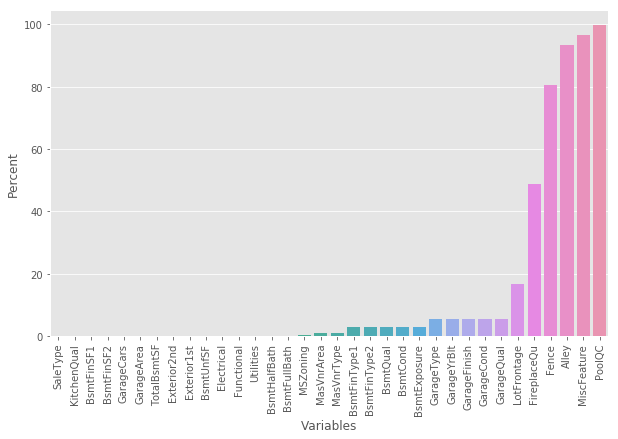

In [8]:
miss_df = pd.DataFrame()
miss_df['Total'] = train_test.isnull().sum()
miss_df['Percent'] = (miss_df['Total'] / len(train_test)) * 100
miss_df = miss_df[miss_df['Percent'] > 0]
miss_df['Variables'] = miss_df.index
miss_df.sort_values(by='Percent', inplace=True)
print('Columns containing missing values :\n')
print(miss_df.drop('Variables', axis=1))
sns.barplot(x='Variables', y='Percent', data=miss_df)
plt.xticks(rotation=90);

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>Lets Handle Features which contains missing values one by one :</span></h4>

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>PoolQC</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>PoolQC has a high percenatge of missing values. We can assume ,Missing values in PoolQC means that house does not have a Pool. That's why it's Pool quality is not available.</li>
  <li>We can verify our assumption through analysis of data. We can search for rows which have PoolArea but no PoolQC. Out of 2909 houses, we can find only 3 rows which have PoolArea but no PoolQC.</li>
  <li>For those 3 rows , for replacing PoolQC we need to look at their PoolArea. We can group houses by PoolQC and determine median PoolArea for each group. Among these 3 rows , 2 of them have PoolArea close to Ex type PoolQc and 1 of them have PoolArea close to Fa type PoolQC. We can replace their PoolQC with Ex and Fa.</li>
  <li>Remaining missing values of PoolQC now can be replaced with a new value 'NA' which means Not Available.</li>
</span></ul>

In [9]:
train_test[(train_test['PoolQC'].isnull()) & (train_test['PoolArea'] > 0)][['PoolQC','PoolArea']]


,PoolQC,PoolArea
2420,NaN,368
2503,NaN,444
2599,NaN,561


In [10]:
train_test.groupby('PoolQC')['PoolArea'].mean()

PoolQC
Ex    359.75
Fa    583.50
Gd    648.50
Name: PoolArea, dtype: float64

In [11]:
train_test.loc[2420,'PoolQC'] = 'Ex'
train_test.loc[2503,'PoolQC'] = 'Ex'
train_test.loc[2599,'PoolQC'] = 'Fa'

In [12]:
train_test['PoolQC'].fillna('NA', inplace= True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>GarageYrBlt</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>GarageYrBlt denotes the year the gaarge was built.We can assume that garage was built at the same time the house was built and this assumption seems reasonable.</li>
  <li>To verify our assumption we can check whether GarageYrBlt and YearBuilt are same or not.</li>
  <li>Out of 2919 houses, 2216 houses have same value for GarageYrBlt and YearBuilt. We can now confirm that our assumption is almost correct.</li>
  <li>we will fill up the missing values of GarageYrBlt with the value of YearBuilt.</li>
</span></ul>

In [13]:
print('Total house :', train_test.shape[0])
print('GarageYrBlt and YearBuilt same for :', end=' ')
print(sum(train_test['GarageYrBlt'] == train_test['YearBuilt']))

Total house : 2919
GarageYrBlt and YearBuilt same for : 2216


In [14]:
train_test.loc[train_test['GarageYrBlt'].isnull(),'GarageYrBlt'] = \
train_test.loc[train_test['GarageYrBlt'].isnull(),'YearBuilt'] 

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>GarageArea and GarageCars</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>If any house does not have value for these two variables, we can assume that that house does not have a Garage.</li>
  <li>In that case we can replace missing values of these variables with zero(0).</li>
</span></ul>

In [15]:
for col in ('GarageArea', 'GarageCars'):
    train_test[col].fillna(0, inplace = True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>GarageQual, GarageFinish, GarageCond and GarageType</span></h4>
<ul><span  style="; font-family: sans-serif; font-size: 1.1em";>
  <li>If any house does not have value for these variables, we can search for their value of GarageArea and GarageCars.</li>
  <li>After anlyzing data we can see that the houses whcih have missing value for these variables have zero(0) value in GarageArea or simple they don't hava Garage.</li>
  <li>That's why we have replaced missing values of these variables 'NA' which means Not Available.</li>
</span></ul>

In [16]:
for col in ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType' ]:
    train_test[col].fillna('NA',inplace= True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Houses which have missing values for these variables means they don't have basement.</li>
  <li>We can replace the missing values with zero(0).</li>
  </span></ul>

In [17]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test[col].fillna(0, inplace=True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Houses which have missing values for these variables means they don't have basement.</li>
  <li>We can replace the missing values with 'No' which means no basement..</li>
  </span></ul>

In [18]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col].fillna('No', inplace=True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>Exterior1st and Exterior2nd</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>For these two variables, we will replace missing values with 'Other' and treat them as a new unique type value.</li>
</span></ul>

In [19]:
for col in ['Exterior1st', 'Exterior2nd']:
    train_test[col].fillna(train_test[col].mode()[0], inplace=True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>KitchenQual, Electrical and Utilities</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Missing values in KitchenQual and Electrical will be replaced with most frequent values.</li>
  <li>Utilities variable will be dropped from full dataset(both test and train datasets)</li>
</span></ul>

In [20]:
train_test['KitchenQual'].fillna(train_test['KitchenQual'].mode()[0], inplace = True)
train_test['Electrical'].fillna(train_test['Electrical'].mode()[0], inplace = True)

train_test.drop(['Utilities'], axis=1, inplace = True)


<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>SaleType and Functional</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>For SaleType, we will replace missing values with most frequent value 'WD'. </li>
  <li>For Functinal, we will replace missing values with most frequent vale 'Typ'.</li>
</span></ul>

In [21]:
train_test['SaleType'].fillna('WD', inplace=True)

In [22]:
train_test['Functional'].fillna('Typ', inplace=True)

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>LotFrontage</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>We can assume that a house will have similar amount of frontage like anyother houses in its neighborhood.</li>
  <li>That's why we will group dataset by neighborhood and replace missing value by the median of all the houses in same neighborhood.</li>
</span></ul>

In [23]:
train_test["LotFrontage"] = train_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>MSZoning</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>We have grouped dataset by MSSubclass and find out most frequent MSZoning for every unique value of MSSubclass</li>
  <li>For missing values of MSZoning, we have find out MSSubclass of that house and replace MSZoning with most frequent MSzoning of that MSSubclass.</li>
</span></ul>

In [24]:
train_test[train_test['MSZoning'].isnull()][['MSZoning','MSSubClass']]

,MSZoning,MSSubClass
1915,NaN,30
2216,NaN,20
2250,NaN,70
2904,NaN,20


In [25]:
train_test.groupby(['MSSubClass','MSZoning'])['MSZoning'].count()

MSSubClass  MSZoning
20          C (all)        3
            FV            34
            RH             4
            RL          1016
            RM            20
30          C (all)        8
            RH             2
            RL            61
            RM            67
40          RL             4
            RM             2
45          RH             1
            RL             6
            RM            11
50          C (all)        7
            RH             2
            RL           159
            RM           119
60          FV            43
            RL           529
            RM             3
70          C (all)        4
            RH             3
            RL            57
            RM            63
75          RL             9
            RM            14
80          RL           115
            RM             3
85          RL            47
            RM             1
90          RH             4
            RL            92
            RM        

In [26]:
train_test.loc[1915,'MSZoning'] = 'RM'
train_test.loc[2216,'MSZoning'] = 'RL'
train_test.loc[2250,'MSZoning'] = 'RM'
train_test.loc[2904,'MSZoning'] = 'RL'

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.1em";>Other variables</span></h4>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Among other variables if they are numerical we will fill them up with mean value.</li>
  <li>For categorical variable , we will replace missing values with mode value( most frequent ).</li>
</span></ul>

In [27]:
train_test['MasVnrType'].fillna('None', inplace = True)

In [28]:
train_test['MasVnrArea'].fillna(0, inplace = True)

In [29]:
cols = train_test.columns.values
num_cols = list(train_df._get_numeric_data().columns.values)
for col in cols:
    if train_test[col].isnull().any():
        
        if col in num_cols:
            train_test[col].fillna(train_test[col].mean(), inplace = True)
        else:
            train_test[col].fillna(train_test[col].mode()[0], inplace = True)
        

In [30]:
train_df = train_test[:n_train]
test_df = train_test[n_train:]
test_df.drop('SalePrice', axis=1, inplace=True)

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 3.2 Categorical Data Encoding </h3>

<p>Our Second task is to deal with Categorical Features and transform them such way that Our model can learn them.</p>
<ul>
    <li> We have tried to encode them preserving Information as much as possible.</li>
    <li>We have used Label Encoding to encode Categorical Features. One hot encoding has not been used as it will increased # of Features hugely which will make model very complex.</li>
    <li>We have drawn Pivot tables for Different Features. From those pivot tables, we decided to encode Features like BsmtCond, BsmtQual , GarageQual, KitchenQual, GarageFin etc as sorted median values. That means lower median to lower numircal value, higher median to higher numerical value.</li>
    <li>Rest of the Features have been encoded using Scikit-Learns LabelEncoder which uses Alphabetic ordering to decide corresponding numerical values unlike what we have done in previous step.</li>
</ul>


          ..............Pivot tables before encoding.................



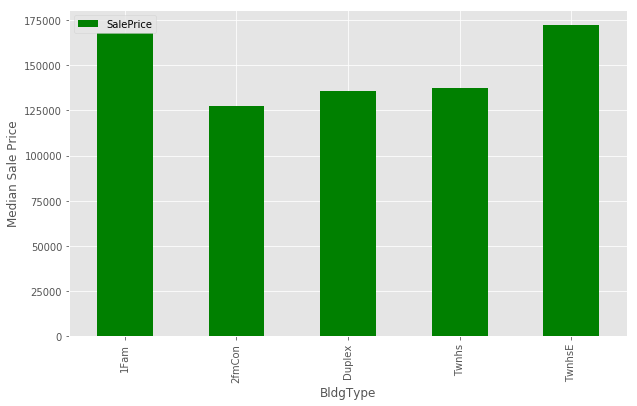

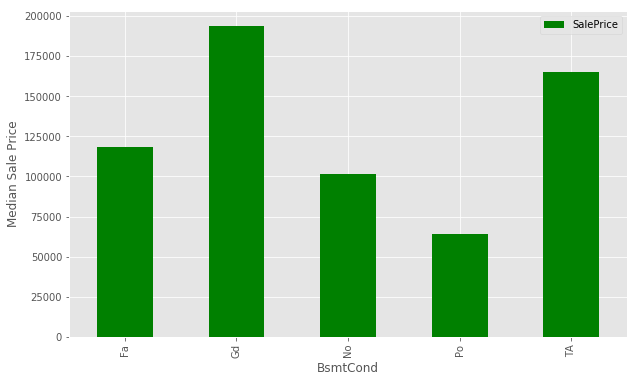

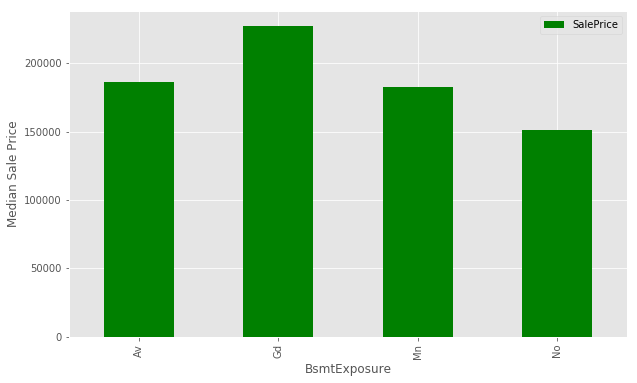

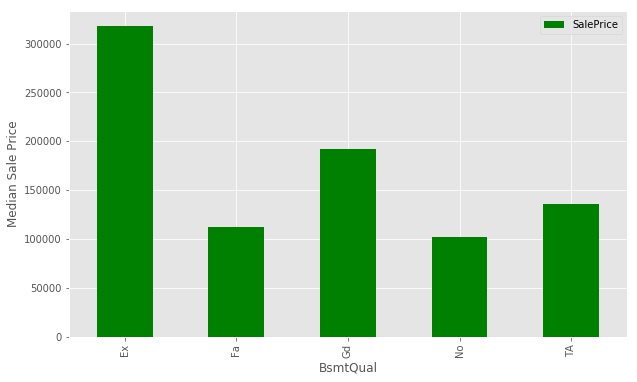

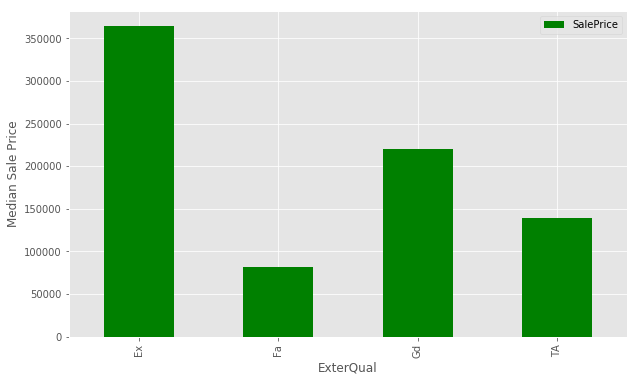

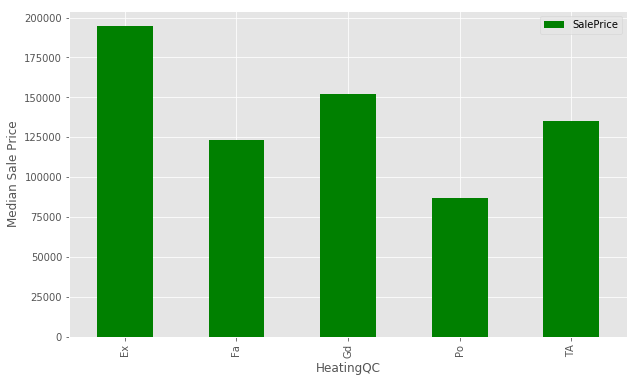

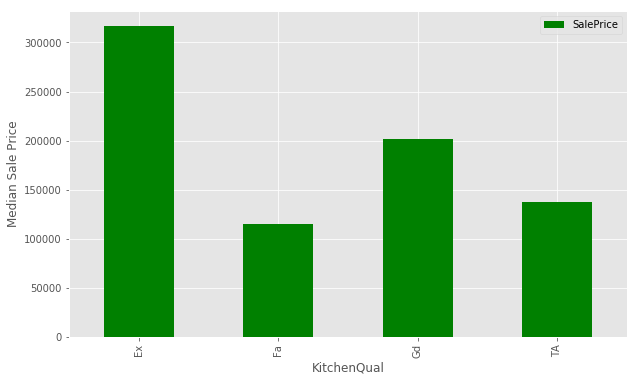

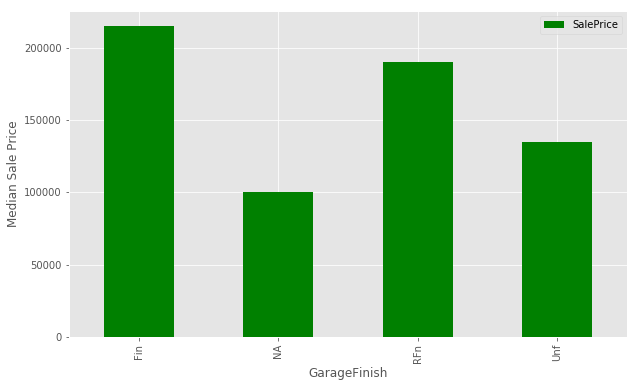

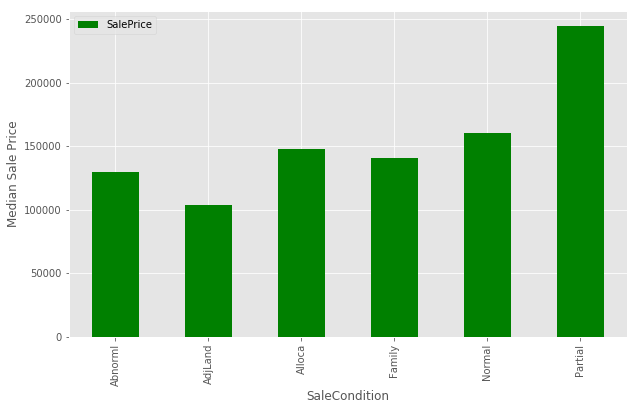

In [31]:
def draw_pivot(x):
    plt.figure()
    cond_pivot = train_df.pivot_table(index = x, values = 'SalePrice', aggfunc = np.median)
    cond_pivot.plot(kind = 'bar', color = 'green')

    plt.xlabel(x)
    plt.ylabel('Median Sale Price')
print('''
          ..............Pivot tables before encoding.................
''')    
for x in ['BldgType','BsmtCond', 'BsmtExposure', 'BsmtQual', 'ExterQual', 'HeatingQC','KitchenQual','GarageFinish','SaleCondition']:
    draw_pivot(x)

In [32]:


# Now we will encode some feature by watching those pictures
# For everything else we will be using label encoding



def encode_bsmt_expo(y):
    t = None
    bsmt_cond = ['NA', 'No', 'Mn', 'Av', 'Gd']
    for ix,x in enumerate(bsmt_cond):
        if x == y:
            t = ix
            break
    return t

def encode_bsmt_cond(y):
    t = None
    bsmt_cond = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    for ix,x in enumerate(bsmt_cond):
        if x == y:
            t = ix
            break
    return t

def encode_ext_qual(y):
    t = None
    bsmt_cond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    for ix,x in enumerate(bsmt_cond):
        if x == y:
            t = ix
            break
    return t

def encode_gar_fin(y):
    t = None
    bsmt_cond = ['Unf', 'RFn', 'Fin']
    for ix,x in enumerate(bsmt_cond):
        if x == y:
            t = ix
            break
    return t

def encode_bld(x):
    return 1 if x == 'TwnhsE' else 0

def encode_sale_cond(x): 
    return 1 if x == 'Partial' else 0

def encode_mas_vnr_type(y):
    t = None
    mas_vnr_type = ['BrkCmn', 'None', 'BrkFace', 'Stone']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_paved_drive(y):
    t = None
    mas_vnr_type = ['N', 'P', 'Y']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_pool_qc(y):
    t = None
    mas_vnr_type = ['NA', 'Gd', 'Fa', 'Ex']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_land_slope(y):
    t = None
    mas_vnr_type = ['Gtl', 'Sev', 'Mod']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_fire_place_qu(y):
    t = None
    mas_vnr_type = ['Po', 'Gd', 'Fa', 'TA', 'Ex']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_garage_qual(y):
    t = None
    mas_vnr_type = ['Po', 'NA', 'Fa', 'Ex', 'TA', 'Gd']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_garage_type(y):
    t = None
    mas_vnr_type = ['NA', 'CarPort', 'Detchd', 'Basment', '2Types', 'Attchd', 'BuiltIn']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

def encode_garage_cond(y):
    t = None
    mas_vnr_type = ['NA', 'Po', 'Fa', 'Ex', 'Gd', 'TA']
    for ix,x in enumerate(mas_vnr_type):
        if x == y:
            t = ix
            break
    return t

hand_encode = {}

x = 'BldgType'
hand_encode[x] = encode_bld

x = 'BsmtCond'
hand_encode[x] = encode_bsmt_cond

x = 'BsmtExposure'
hand_encode[x] = encode_bsmt_expo

x = 'BsmtQual'
hand_encode[x] = encode_bsmt_cond

x = 'ExterQual'
hand_encode[x] = encode_ext_qual

x = 'HeatingQC'
hand_encode[x] = encode_ext_qual

x = 'KitchenQual'
hand_encode[x] = encode_ext_qual

x = 'GarageFinish'
hand_encode[x] = encode_gar_fin

x = 'SaleCondition'
hand_encode[x] = encode_sale_cond

x = 'MasVnrType'
hand_encode[x] = encode_mas_vnr_type

x = 'PavedDrive'
hand_encode[x] = encode_paved_drive

x = 'PoolQC'
hand_encode[x] = encode_pool_qc

x = 'LandSlope'
hand_encode[x] = encode_land_slope

x = 'FireplaceQu'
hand_encode[x] = encode_fire_place_qu

x = 'GarageQual'
hand_encode[x] = encode_garage_qual

x = 'GarageCond'
hand_encode[x] = encode_garage_cond

x = 'GarageType'
hand_encode[x] = encode_garage_type

for x,f in hand_encode.items():
    new_col = train_df[x].apply(f)
    train_df[x] = new_col
    new_col = test_df[x].apply(f)
    test_df[x] = new_col



          ..............Pivot tables After encoding.................



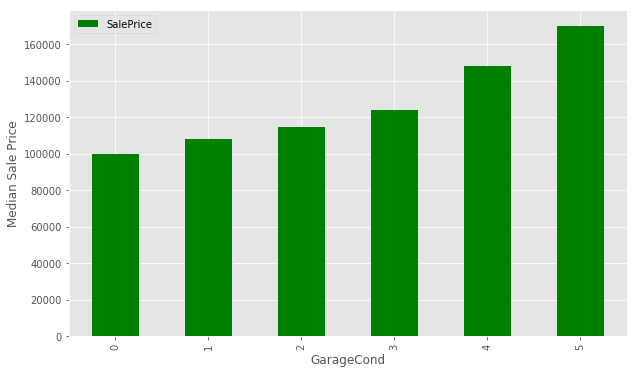

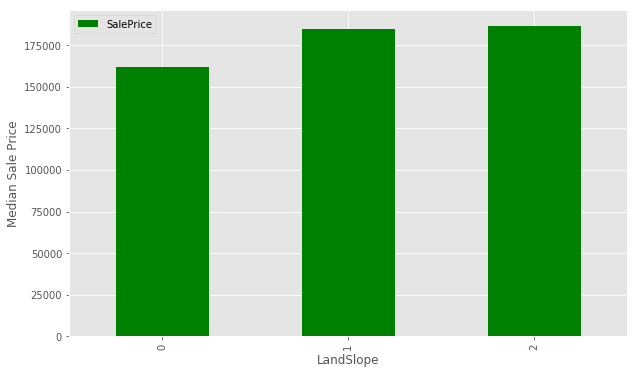

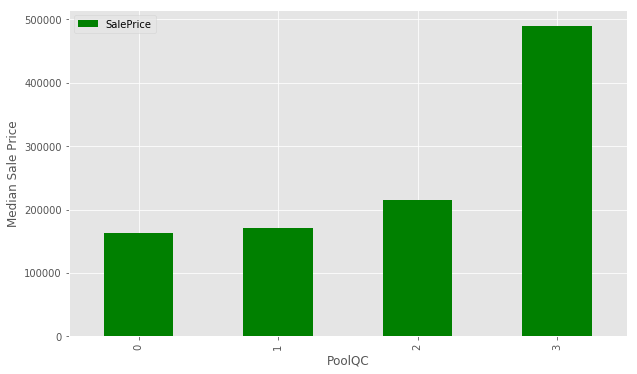

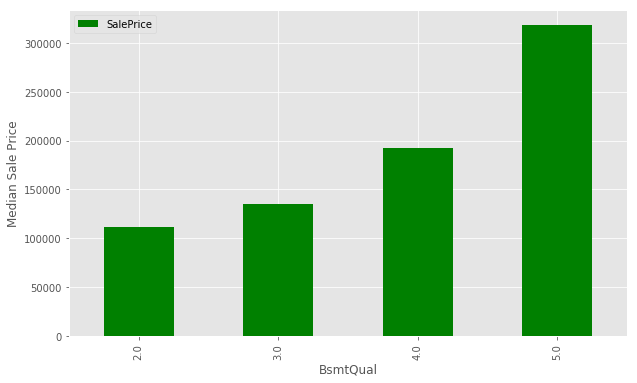

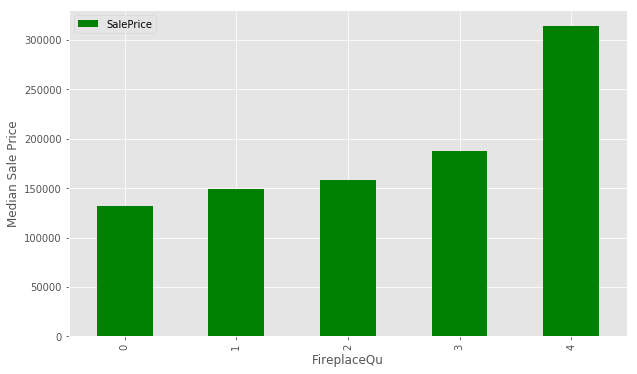

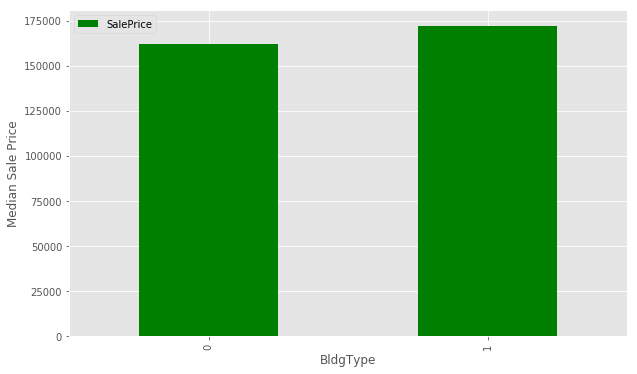

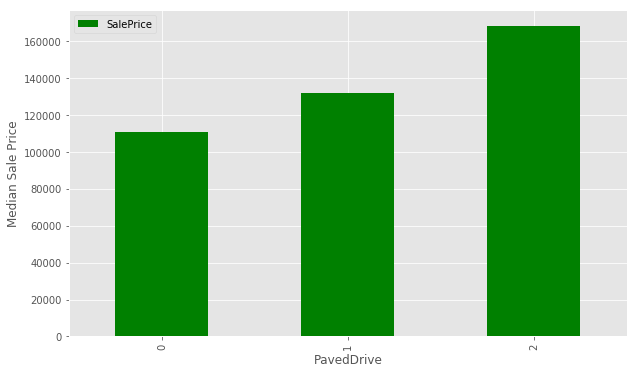

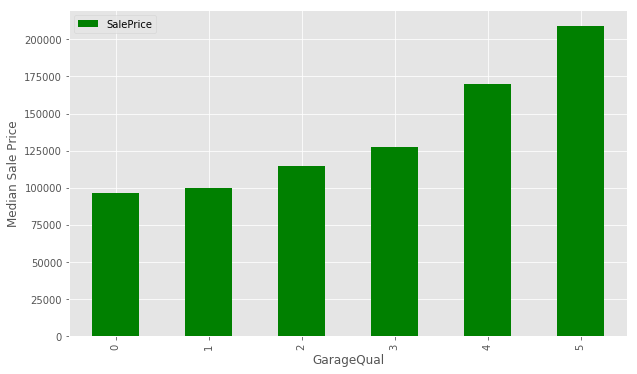

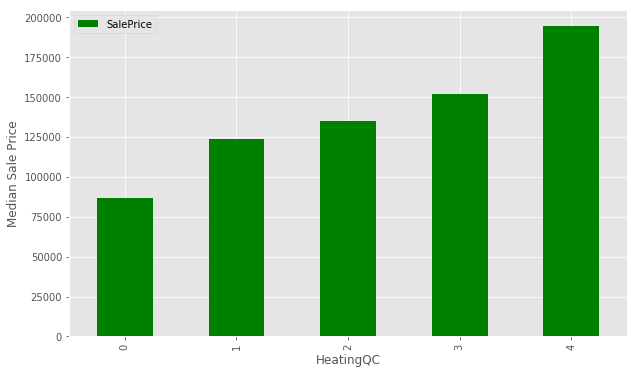

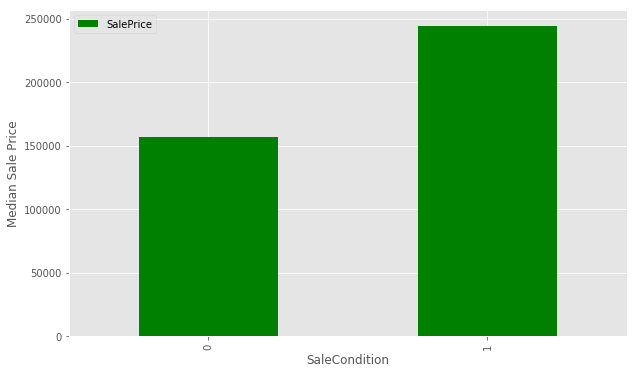

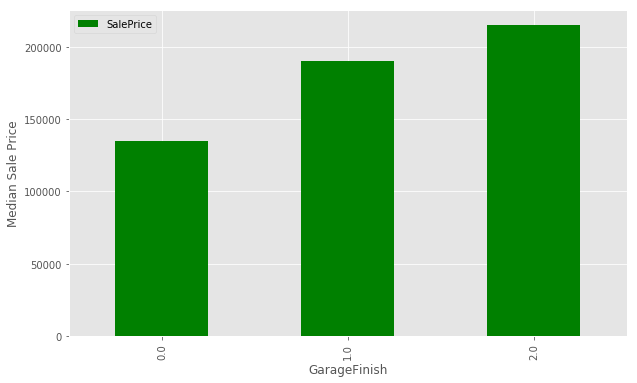

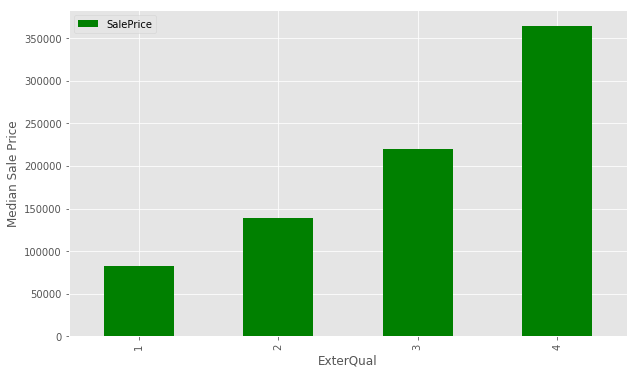

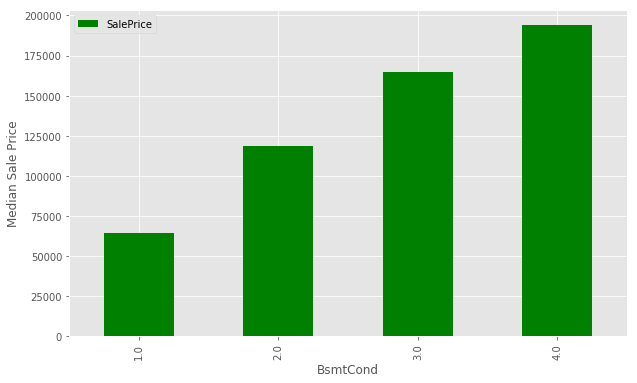

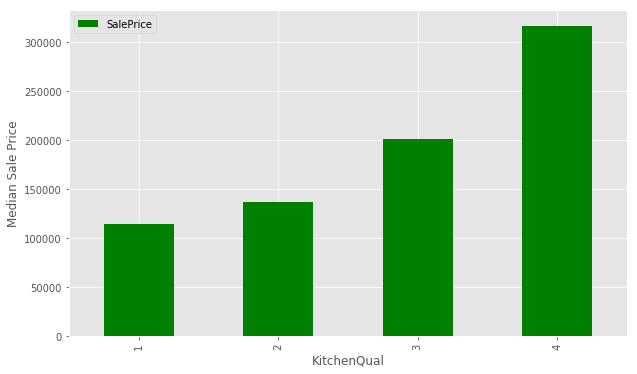

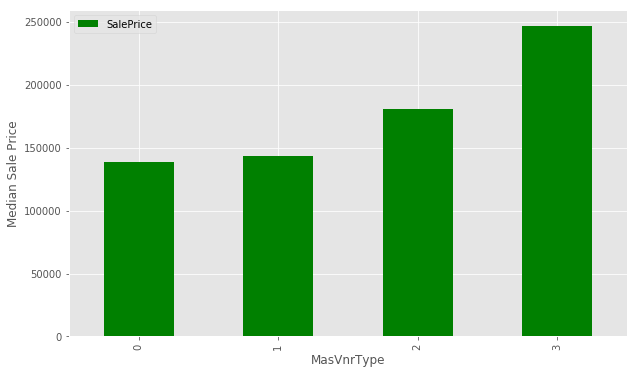

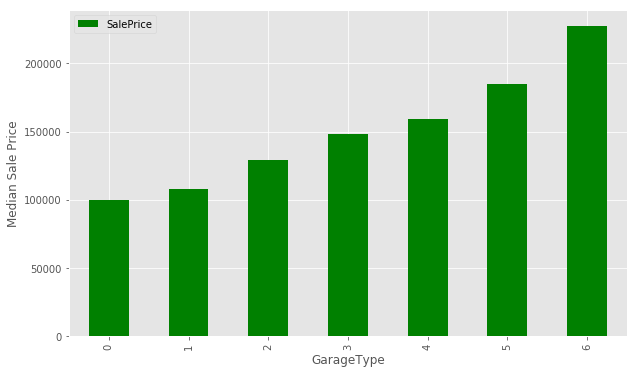

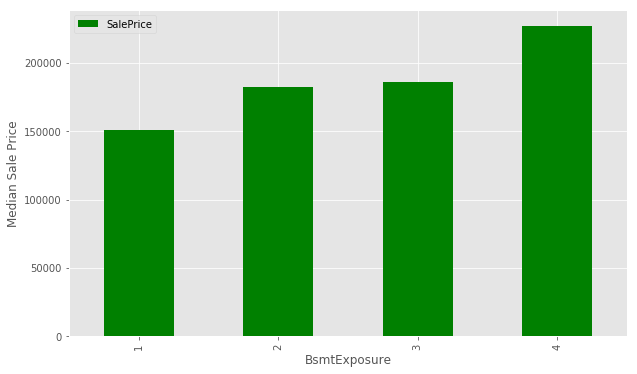

In [34]:
print('''
          ..............Pivot tables After encoding.................
''')

for x,_ in hand_encode.items():
    draw_pivot(x)

In [35]:
%%capture
cols = train_df.columns.values
num_cols = list(train_df._get_numeric_data().columns.values)
len(cols)
len(num_cols)
num_cols.remove('Id')
num_cols.remove('SalePrice')

for x in cols:
        if ((x not in num_cols) and (x not in ['Id', 'SalePrice'])):
            print('cat',x)
            ft = train_df[x].dropna().unique()
            le = preprocessing.LabelEncoder()
            le.fit(ft)

            new_col = le.transform(train_df[x])
            train_df[x] = new_col

            mode = test_df[x].dropna().mode()[0]
            test_df[x] = test_df[x].fillna(mode)
            new_col = le.transform(test_df[x])
            test_df[x] = new_col
            
        
        

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 3.3 Handling Outliers </h3>

<p> To make our model robust and stable, we need to take care of this Outliers. Outliers can happen but how can we detect them ?</p>
<p>We have detected them using two procedure :</p>
<dl>
    <dt><dt><span  style="color: #EC407f; font-family: sans-serif; font-size: 1em";>Visualization</span></dt> </dt>
    <dd>We see scatter plot for some highly related features VS Sale Price . This will visually give us which points are outliers and this method is very fast and easy. From our observations Datapoints 129,523,332,496,460 are outlers and suspicious. We have just deletd these Datapoints as we have enough Data points to train model.</dd>
    <dt><dt><span  style="color: #EC407f; font-family: sans-serif; font-size: 1em";>Residual vs Leverage graph</span></dt> </dt>
    <dd>Residual vs Leverage graph shows us the resiudal between Predicted target val8ue and Actual Target value. Datapoints for which we8 have high residuals, we 8can consider them as Outliers. All the data points rather 691 and 1182 are not that suspicious. We have just deleted these two datapoints. </dd>
</dl>

      3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  BsmtExposure  \
1298          0      0             3         0       3.0             4   
523           0      0             3         0       3.0             4   

      BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2   ...    SaleType  \
1298      5644.0         0.0             2             6   ...           6   
523       2260.0         0.0             2             6   ...           6   

      ScreenPorch  SndFlrSF  Street  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
1298            0       950       1            12       6110.0         214   
523             0      1538       1            11       3138.0         208   

      YearBuilt  YearRemodAdd  YrSold  
1298       2008          2008    2008  
523        2007          2008    2007  

[2 rows x 80 columns]
     3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  BsmtExposure  \
332          0      0             3         0       3.0             1   
496          0    

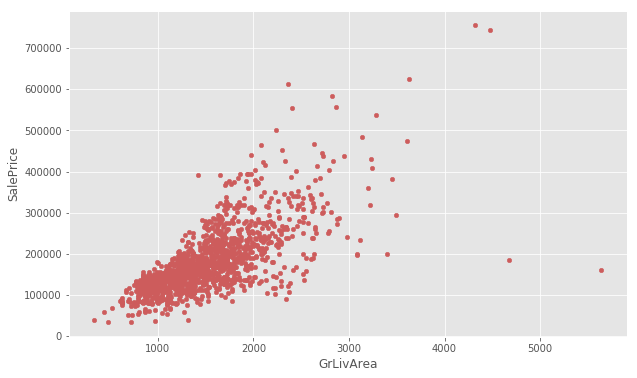

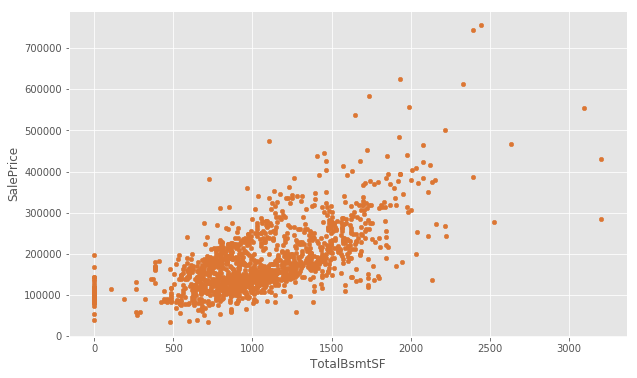

In [37]:
'''
       .......................outliers..........................................

'''


# lets find some outliers visually

x = 'GrLivArea'

train_df.plot(kind="scatter", x=x, y="SalePrice", color='#CD5C5C')

#right most lower side have two outliers
#lets find and delete them
print(train_df.sort_values(by = 'GrLivArea', ascending = False)[:2])
train_df.drop(train_df.index[[1298,523]], inplace = True)

x = 'TotalBsmtSF'
train_df.plot(kind="scatter", x=x, y="SalePrice", color='#DC7633')

print(train_df.sort_values(by = 'TotalBsmtSF', ascending = False)[:3])
train_df.drop(train_df.index[[332,496,440]], inplace = True)


plt.show()

In [38]:
'''
..............................Residual vs Leverage......................................

'''

#.........................Lets find outliers and delete them............................

influencial_cols = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']
math_expr = 'SalePrice ~'

for x in influencial_cols:
    math_expr += ' '+x+' '+'+'

math_expr = math_expr[:-2]
print(math_expr)

SalePrice ~ OverallQual + GarageCars + FullBath + TotRmsAbvGrd + YearBuilt + YearRemodAdd


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     622.7
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:35:43   Log-Likelihood:                -17538.
No. Observations:                1455   AIC:                         3.509e+04
Df Residuals:                    1448   BIC:                         3.513e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.686e+05    1.4e+05     -6.925   

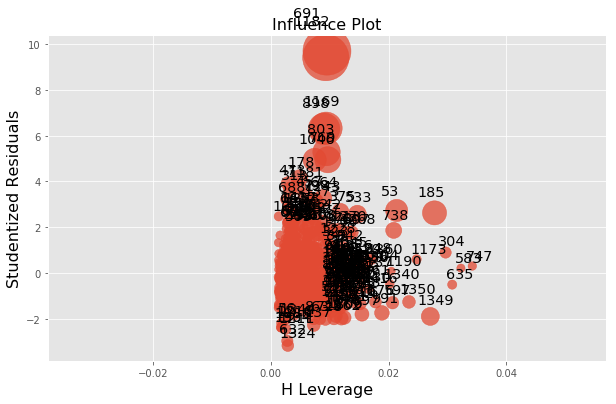

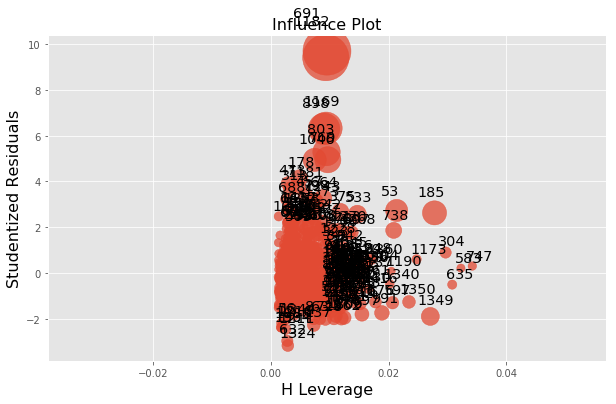

In [39]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg = smf.ols(math_expr, data = train_df)

# if want to see members of the model
#print(dir(reg))

res = reg.fit()
#print(dir(res))

print(res.summary())
sm.graphics.influence_plot(res)

In [40]:
train_df.drop(train_df.index[[691,1182]], inplace = True)

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 3.4 Normality of Distributions </h3>
	<p>Most of the Machine Learning models make assumption that their Data points are coming from Normal Distributions</p>
	<p>That's why we need to check whether Sale Price is following Normal Distribution or not. We also need to ensure that features are following Normal Distribution too. This wiil increase model's accuracy and robustness.</p>
	<ul>
		<li>If we see the prob plot and Q-Q plot of target we can see that its distribution is skewed. We have just applied log transformation on target and this have solved the problem.</li>
		<li>Among features we have log transformed Total Basement Sqft and Garage Area.</li>
		<li>Later we have made list of Features with High Skewness and Kurtosis value. These Features many of them contain 0 for which we can't apply Log Transformation on these Features. That's why we have applied Box-Cox Transformation on these features.</li>
	</ul>

Skewness of Sale price : 1.8675740828695728
kurtosis of Sale price : 6.577220719435563


Text(0.5,1,'After Transformation TotalBsmtSF 2')

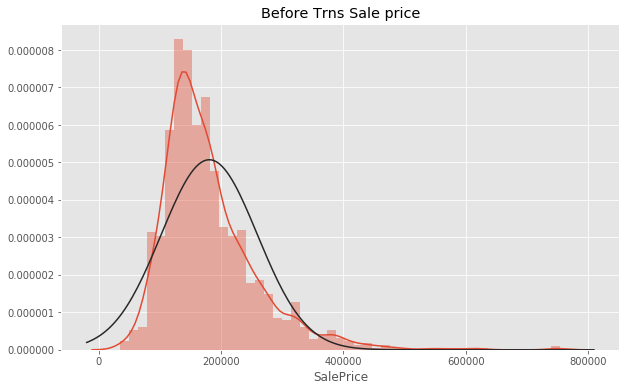

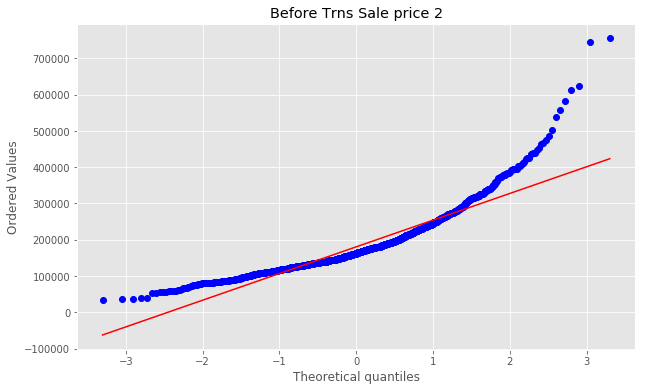

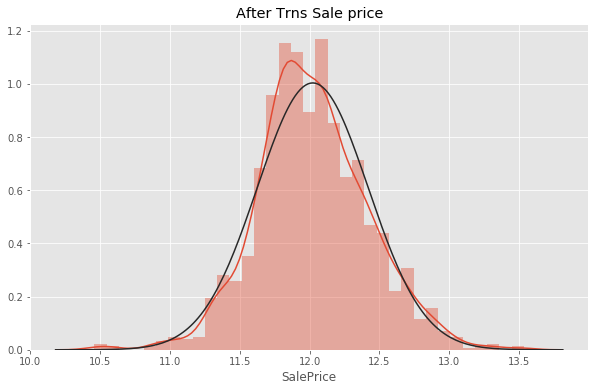

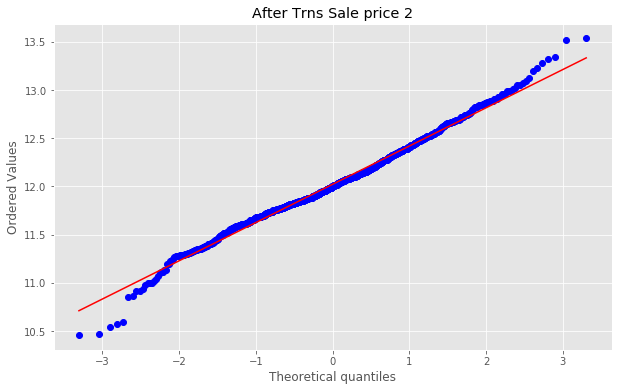

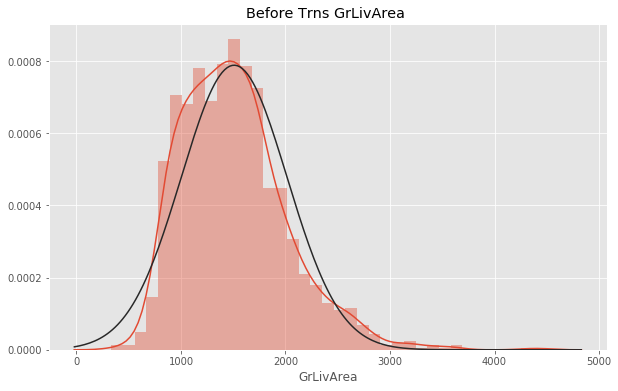

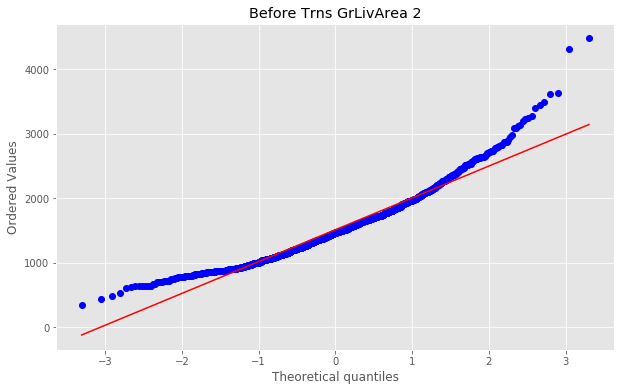

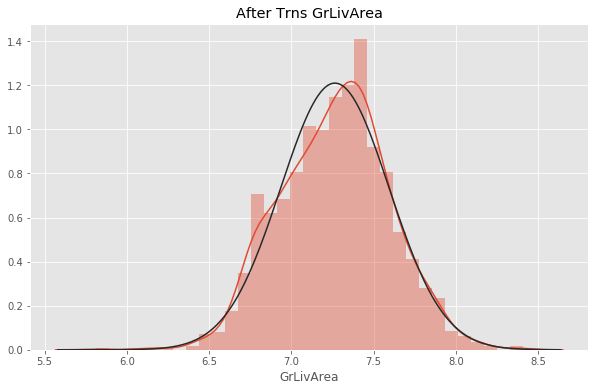

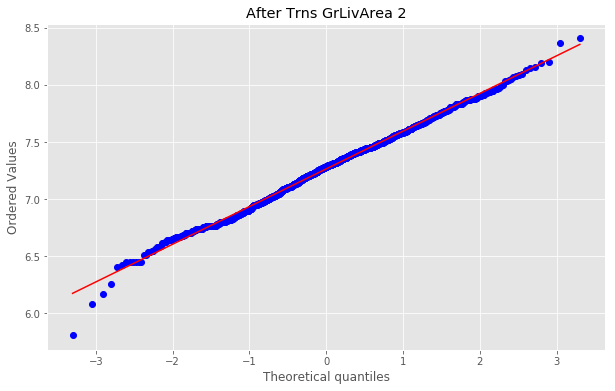

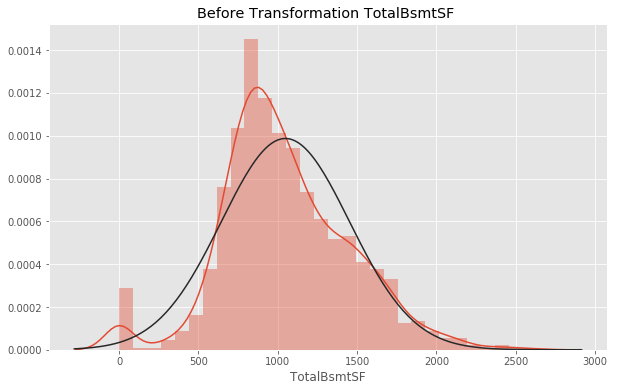

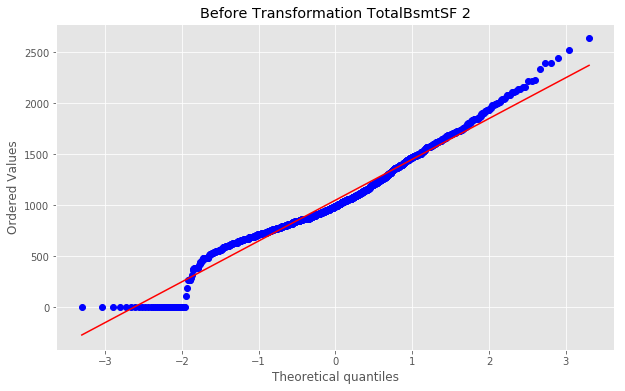

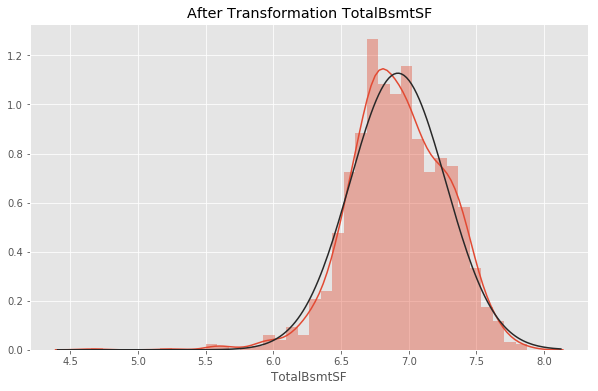

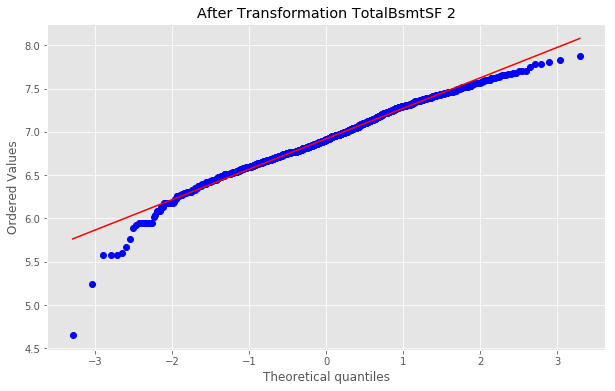

In [41]:
'''
          ..................Normal distribution check...............................
'''

def logarithm(x):
    return math.log(x) if x>0 else 0


#histogram and normal probability plot

print('Skewness of Sale price :', train_df['SalePrice'].skew())
print('kurtosis of Sale price :', train_df['SalePrice'].kurt())

#histogram and Q-Q probability plot
fig = plt.figure()
sns.distplot(train_df['SalePrice'], fit = norm);
plt.title('Before Trns Sale price')


fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.title('Before Trns Sale price 2')


# After Transformation


train_df['SalePrice'] = np.log1p(train_df['SalePrice'])



fig = plt.figure()
sns.distplot(train_df['SalePrice'], fit = norm);
plt.title('After Trns Sale price')


fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.title('After Trns Sale price 2')


#histogram and Q-Q probability plot of GrLivArea
fig = plt.figure()
sns.distplot(train_df['GrLivArea'], fit = norm);
plt.title('Before Trns GrLivArea ')
plt.savefig('Before Trns GrLivArea.png')

fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)
plt.title('Before Trns GrLivArea 2')
plt.savefig('Before Trns GrLivArea 2.png')


# After Transformation
temp_df = train_df['GrLivArea'].apply(logarithm)
train_df['GrLivArea'] = temp_df
temp_df2 = test_df['GrLivArea'].apply(logarithm)
test_df['GrLivArea'] = temp_df2


fig = plt.figure()
sns.distplot(train_df['GrLivArea'], fit = norm);
plt.title('After Trns GrLivArea')
plt.savefig('After Trns GrLivArea.png')

fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)
plt.title('After Trns GrLivArea 2')
plt.savefig('After Trns GrLivArea 2.png')

#plt.show()


#histogram and Q-Q probability plot of TotalBsmtSF
fig = plt.figure()
sns.distplot(train_df['TotalBsmtSF'], fit = norm);
plt.title('Before Transformation TotalBsmtSF ')
plt.savefig('Before Transformation TotalBsmtSF.png')

fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)
plt.title('Before Transformation TotalBsmtSF 2')
plt.savefig('Before Transformation TotalBsmtSF 2.png')



#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

test_df['HasBsmt'] = pd.Series(len(test_df['TotalBsmtSF']), index=test_df.index)
test_df['HasBsmt'] = 0 
test_df.loc[test_df['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])
test_df.loc[test_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(test_df['TotalBsmtSF'])




# After Transformation

fig = plt.figure()
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm);
plt.title('After Transformation TotalBsmtSF')


fig = plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)
plt.title('After Transformation TotalBsmtSF 2')


#plt.show()

<h4><span  style="color: #FF5733; font-family: sans-serif; font-size: 1.2em";> Box-Cox Transformation</span></h4>

<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
  <li>Some features have too high skewness and kurtosis.</li>
  <li>Most of these features contains zero(0) . That's why it's not possible to apply Log transformation on these features.</li>
  <li>To handle this problem, we have applied box-cox transformation on these features.</li>
</span></ul>

In [42]:

# features wth high skewness
def f(x):
    return x.skew(),x.kurt()

skewed_cols = train_df[num_cols].apply(f)
skewed_cols = skewed_cols.sort_values(ascending=False)
skewed_vars = []
skewness =[]
kurt = []
for i,j in skewed_cols.items():
    skewed_vars.append(i)
    skewness.append(j[0])
    kurt.append(j[1])
    

In [43]:
print('''
       ....................Skewness and Kurtosis of Features.................
''')
skew_df = pd.DataFrame({'Skew' :skewness, 'Kurt':kurt}, index=skewed_vars)
skew_df


       ....................Skewness and Kurtosis of Features.................



,Kurt,Skew
MiscVal,697.650149,24.418262
PoolQC,359.657533,18.462562
PoolArea,256.850836,15.921308
Condition2,288.326190,14.941187
LotArea,213.013888,12.560013
3SsnPorch,123.050511,10.278995
Heating,110.967589,9.830804
LowQualFinSF,82.813846,8.988970
RoofMatl,66.524433,8.116394
Alley,30.577308,5.703965


In [44]:
# Features having skewness > 0.75 will be used for Box-Cox transformation

print('''
      ....................Features wth High Skewness and Kurtosis.................

''')
skew_df = skew_df[abs(skew_df['Skew']) > 0.70]
skew_df


      ....................Features wth High Skewness and Kurtosis.................




,Kurt,Skew
MiscVal,697.650149,24.418262
PoolQC,359.657533,18.462562
PoolArea,256.850836,15.921308
Condition2,288.326190,14.941187
LotArea,213.013888,12.560013
3SsnPorch,123.050511,10.278995
Heating,110.967589,9.830804
LowQualFinSF,82.813846,8.988970
RoofMatl,66.524433,8.116394
Alley,30.577308,5.703965


In [45]:
from scipy.special import boxcox1p

In [46]:
print('''
      .................Box-Cox Transformation...................
''')
print('  Box-Cox will be used for # of features : ', skew_df.shape[0])
lambda_ = 0.15
skewed_vars= skew_df.index.values
for var in skewed_vars:
    train_df[var] = boxcox1p(train_df[var], lambda_)
    test_df[var] = boxcox1p(test_df[var], lambda_)
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)


      .................Box-Cox Transformation...................

  Box-Cox will be used for # of features :  51


<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1.05em";>Ch 4 : Feature Construction</span></h2>
<br><br>
<dl>
	<dt><span  style="color: #FF5A33; font-family: sans-serif; font-size: 1.1em";>Customizing New Features from addition and divison</span></dt>
	<dd>
		<ul>
			<li>TotalSF is a new feature from adding TotalBsmtSF, FstFlrSF and SndFlrSF. It means total square feet of Area which is usable from a House.</li>
			<li>FlrSF is a new feature from adding FstFlrSF and SndFlrSF. It denotes the total area which can be used for dwelling.</li>
			<li>RoomSize is a new feature which indicates the average size of a room.</li>
		</ul>
	</dd>
	<dt><span  style="color: #FF5A33; font-family: sans-serif; font-size: 1.1em";>Customizing New Features from multiplication</span></dt>
<dd><ul>
		<li>Features created from Highly correlated features will add to diemnsionality and capture features in higher dimension. That's why we have multiplicated pair of features to create new features.</li>
	</ul></dd>
</dl>



In [47]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['FstFlrSF'] + train_df['SndFlrSF']
train_df['FlrSF'] = train_df['FstFlrSF'] + train_df['SndFlrSF']
train_df['RoomSize'] = train_df['FlrSF']/ train_df['TotRmsAbvGrd']

In [48]:
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['FstFlrSF'] + test_df['SndFlrSF']
test_df['FlrSF'] = test_df['FstFlrSF'] + test_df['SndFlrSF']
test_df['RoomSize'] = test_df['FlrSF']/ test_df['TotRmsAbvGrd']

In [49]:
'''

            .................Feature Construction.........................

'''

import itertools

influencial_cols = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'ExterQual', 'KitchenQual', 'BsmtQual', 'TotalBsmtSF'] # they have high correlation with SalePrice


for a,b in itertools.combinations(influencial_cols,2):
    
    s = a+str('*')+b
    #print(s)
    train_df[s] = None
    test_df[s] = None
    train_df[s] = train_df[a] * train_df[b]
    test_df[s] = test_df[a] * test_df[b]
    num_cols.append(s) # include the new created feature in numerical feature list
    
print('After feature construction # of features : %i'%len(train_df.columns.values))

After feature construction # of features : 139


<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1.05em";>Ch 5 : Feature Selection</span></h2>
<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
    <Li>Next we need to select a moderate amount of features from all features as it will make the model complex and overfitting if we take all features.</li>
	<li>We have used Select from Model method for Feature selection. This method uses Random Forest Regressor to select features which have more or equal feature importance than threshold value.</li>
	<li>We will take best 25 features to train Our model.</li>
    <li> After selecting features , we have used Robust scaler to scale the features. Robust Scaler performs better than MinMax Scaler.
    </span></ul>

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [52]:
y = train_df.SalePrice
new_train_df = train_df.drop(['SalePrice', 'Id'], axis=1)

X = new_train_df.values


X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)




<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 5.1 Feature Importance</h3>

<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
    <li>We have used a Random Forest Regressor model to determine the feature importance of all features.</li>
    <li>A Bar plot showing Feature Importances have been drawn.
    </span></ul>


     ..........................Feature Importances.......................................
    

                          importance
feature                             
OverallQual*GrLivArea          0.199
OverallQual*KitchenQual        0.139
GrLivArea*ExterQual            0.091
OverallQual*TotalBsmtSF        0.054
GarageCars*ExterQual           0.047
YearBuilt*GrLivArea            0.045
OverallQual*GarageCars         0.041
GrLivArea*TotalBsmtSF          0.040
YearRemodAdd*GrLivArea         0.033
CentralAir                     0.017
OverallQual*YearRemodAdd       0.016
OverallQual*ExterQual          0.016
OverallQual*BsmtQual           0.013
OverallQual                    0.013
BsmtFinSF1                     0.010
TotRmsAbvGrd*BsmtQual          0.010
OverallQual*YearBuilt          0.009
LotShape                       0.008
FstFlrSF                       0.007
YearRemodAdd*TotalBsmtSF       0.007
OverallCond                    0.007
GarageCars*BsmtQual            0.007
GrLivArea      

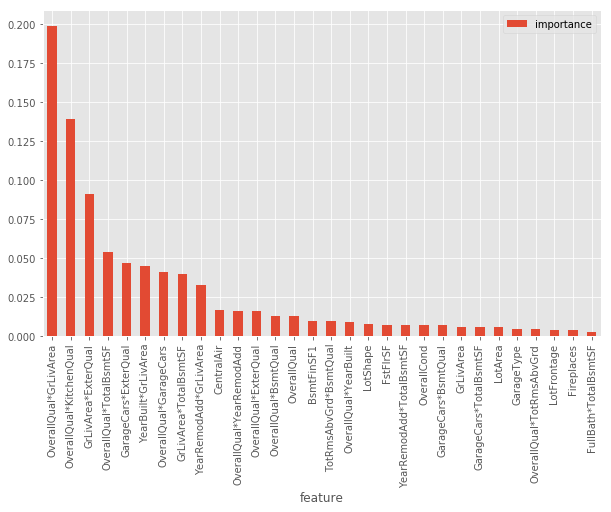

In [54]:
print('''
     ..........................Feature Importances.......................................
    
''')

etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
importances = pd.DataFrame({'feature':new_train_df.columns,'importance':np.round(etr.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances.head(30))
importances[:30].plot.bar()

In [55]:
%%capture
'''
     ..........................Feature Selection.......................................
    
'''


#.............................Select from model feature selection.......................




temp_clf = ExtraTreesRegressor().fit(X_train,y_train)
fselect = SelectFromModel( estimator = temp_clf, threshold = 0.005)
fselect.fit(X, y)

X_train_new = fselect.transform(X_train)
X_test_new = fselect.transform(X_test)

In [56]:
print('''
     ..........................Feature Selection.......................................
    
''')
print('# of Selected features :',X_test_new.shape[1])


     ..........................Feature Selection.......................................
    

# of Selected features : 25


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 5.2 Feature Scaling</h3>
<ul><span  style=" font-family: sans-serif; font-size: 1.1em";>
  <li>Feature scaling is used to transform every feature's value range to a standard range.</li>
  <li>We have tried 3 different types of Feature Scaling:
    <ol>
      <li>MinMaxScaler</li>
      <li>Normalizer</li>
      <li>RobustScaler</li>
    </ol>
  </li>
  <li>Among 3 Scaler, RobustScaler has been used finally as It withstands the effect of outliers and performs better than other two.</li>

</ul>

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [58]:
fscale = RobustScaler().fit(X_train_new,y_train)


X_train_new = fscale.transform(X_train_new)
X_test_new = fscale.transform(X_test_new)

<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1em";>Ch 6 : ANN model building</span></h2>

<span  style=" font-family: sans-serif; font-size: 1.05em";>After all these steps we have to come to most crucial step : ANN Model Building. We will build our model in this step. For model Building We have used Scikit-Learn provided Deep Neural Network :  MLPRegressor.</span>

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1em";> 6.1 Hyperparameter Tuning</h3>
	
<ul><span  style=" font-family: sans-serif; font-size: 1em";>
    <li>Hyperparameters are parameters which are provided to Machine Learning models before training as models can't learn these parameters themselves. These parameters are very important for models as they determines models capacity.</li>
    <li>For robust and successful model building , we need to find out best Hyperparameters.</li>
    <li>For Hyperparameter tuning we have selected following hyperparameters to tune :<ol>
        <li><dt># of Hidden Layers :</dt> How many layers should we use to build our neural network model ?</li>
        <li><dt># of Nodes per Hidden Layer :</dt> How many nodes should each layer have ? Too many nodes would make the model complex, too little nodes would reduce validation accuracy.</li>
        <li><dt>Optimizer : </dt> Which type of optimizer should we use to train the model considering available computational resources ?</li>
        <li><dt>Alpha :</dt> Regularization parameter. WE have to make sure that our model does not overfit training data . That's why we need to tune regularization parameter.</li>
        <li><dt>Activation :</dt> Activation intoduces non-linearity in the nodes of neural network. What type of activation is best suited for our project ?</li>
        <li><dt>Max iteration</dt></li>
        <li><dt>Learning rate :</dt> While doing backpropagation in the network, we need to make sure to take small steps towards minima either our model will face oscillation in validation accuracy.</li>
    </ol></li>
    <li>To find best combination of Hyperparameter from Hyperparameter Space , we have two available method:
        <ul>
            <li>Grid Search method</li>
            <li>Bayesian Optimization</li>
        </ul></li>
</span></ul>


| Hyper Parameter    | Type      | Possible Values          |
|--------------------|-----------|--------------------------|
| # of Hidden Layers | Integer   | 5,10,20                  |
| # of Nodes         | Integer   | 20,32,64                 |
| Optimizer          | Algorithm | Adam, SGD, Rmsprop       |
| Activation         | Function  | ReLu, Identity, Logistic |
| Learning rate      | Float     | 0.001, 0.0002            |
| Alpha              | Float     | 0.001, 0.01              |
| Batch size         | Integer   | 10, 200, 300             |
|                    |           |                          |

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 6.2 Grid Search Method</h3>
	<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
		<li> In Grid search for a set of different combinations of hyperparameters, we train the model and observe its performance. Next we pick the combination for which our model perform best.</li>
	</span></ul>

<h4><span  style="color: #FF5A33; font-family: sans-serif; font-size: 1.05em";> 6.2.1 Optimizer and Activation</h4>

<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
    <li>There are different types of Optimizer : Adam, RMSprop, Adadelta, SGD etc. Considering our training size and regression problem one of this optimizer would be best choice for model building.</li>
    <li>Just like optimizer there are many tytpes of activation function too : 'relu', 'linear'/'identity', 'tanh', 'logistic'. As our problem is a regression problem one of the activation function from this list would be desirable.</li>
    <li>As we have expected, after running Grid Search through our Hyper Parameter space consisting of two Hyper Parameter Optimizer and Activation, The ** Best Match ** for these two Hyper Parameters are :
        <ol>
            <li> Optimizer : ** Adam **</li>
            <li> Activation : ** ReLu **</li>
        </ol>
    </li>
</span></ul>

In [62]:
def create_model(optimizer,activation):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=25, kernel_initializer='normal', activation=activation))
    model.add(Dense(300, kernel_initializer='normal',activation=activation))
    model.add(Dense(300, kernel_initializer='normal',activation=activation))
    model.add(Dense(1, kernel_initializer='normal', activation=activation))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [63]:
best_score = -np.inf
best_params={'optimizer': None, 'activation': None}
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activations = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
for opt in optimizers:
    for act in activations:
        model = KerasRegressor(build_fn=create_model, optimizer=opt,activation=act,epochs=1, batch_size=200,verbose=0)
        model.fit(X_train_new,y_train)
        score = model.score(X_test_new,y_test)

        if score > best_score:
            best_score = score
            best_params['optimizer'] = opt
            best_params['activation'] = act

print("Best: %f using %s" % (best_score, best_params))


Best: -0.741726 using {'optimizer': 'Nadam', 'activation': 'softplus'}


<h4><span  style="color: #FF8D33; font-family: sans-serif; font-size: 1.05em";> 6.2.2 Batch size and Max iterations</h4>
	<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
		<li>For Adam type optimizer, Batch size is very important. Batch size denotes at a time how many training data points from training dataset would be used .</li>
		<li>Max iterations means how many times our model will ** see ** the full training dataset.</li>
		<li>We will pass Batch size to neural network model through **batch_size** parameter and Max iterations through **max_iter** parameter.</li>
		<li>Our Hyper Parameter space consists of two Hyper Parameter Batch size and Max iterations. Next we have run Grid Search through this Hyper Parameter space. The ** Best Match ** for these two Hyper Parameters are :
				<ol>
					<li> Batch size : ** 300 **</li>
					<li> Max iterations : ** 300 **</li>
				</ol>
			</li>
	</span></ul>

In [65]:
if __name__ == '__main__':

    batch_size = [100,200,300,400]
    max_iter = [100,200,300,400]
    param_grid = dict(batch_size=batch_size, max_iter=max_iter)
    grid = GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(200,300,300), solver='adam', activation='relu'), param_grid=param_grid, cv = 5,scoring='neg_mean_squared_error',n_jobs=-1)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -27611.650655 using {'max_iter': 300, 'batch_size': 300}


<h4><span  style="color: #FF5A33; font-family: sans-serif; font-size: 1.05em";> 6.2.3 Alpha( Regularization ) and Learning rate</h4>
		<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
			<li>Alpha indicates L2 penalty (regularization term) parameter. Regularization is needed to stop model from overfitting or ** memorizing training data ** and to generalize the model. We will explore through various values ranging from 0.00001 to 1.</li>
			<li>We will pass Alpha through **alpha** parameter to model.</li>
			<li>Learning rate means the step-size in updating the weights. Just like Alpha We will explore through various values ranging from 0.00001 to 1.</li>
			<li>To neural network model from scikit-learn we will pass learning rate through **learning_rate_init** parameter and keep **learning_rate** parameter value at 'constant'.</li>
			<li>Our Hyper Parameter space consists of two Hyper Parameter : Alpha and Learning rate. Next we have run Grid Search through this Hyper Parameter space. The ** Best Match ** for these two Hyper Parameters are :
				<ol>
					<li> Alpha : ** Adam **</li>
					<li> Learning rate : ** ReLu **</li>
				</ol>
			</li>
		</span></ul>

In [67]:
if __name__ == '__main__':

    alpha = np.logspace(0,-5,base=10,num=12)
    learning_rate_init = np.logspace(0,-5,base=10,num=12)
    param_grid = dict(alpha=alpha,learning_rate_init=learning_rate_init)
    grid = GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(200,300,300), solver='adam', activation='relu',\
        batch_size=300,max_iter=300,learning_rate='constant'), param_grid=param_grid, cv = 5,n_jobs=-1)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.258234 using {'learning_rate_init': 0.12328467394420663, 'alpha': 0.00023101297000831605}


In [68]:
if __name__ == '__main__':

    alpha = np.logspace(0,-5,base=10,num=15)
    learning_rate_init = np.logspace(0,-5,base=10,num=15)
    param_grid = dict(alpha=alpha,learning_rate_init=learning_rate_init)
    grid = GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(200,300,300), solver='adam', activation='relu',\
        batch_size=300,max_iter=100,learning_rate='constant'), param_grid=param_grid, cv = 5,n_jobs=-1)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.016321 using {'learning_rate_init': 0.08483428982440722, 'alpha': 0.00026826957952797245}


<h4><span  style="color: #FF8D33; font-family: sans-serif; font-size: 1.05em";> 6.2.3 # of Hidden Layers and # of Nodes per layer</h4>

<ul>
  <li># of Hidden layers and # of Nodes per layer are very important for neural network model. As these two Hyper Parameter changes neural network model changes dramatically. These two Hyper Parameters determines neural network model's capability and complexity.</li>
  <li>Our Hyper Parameter space consists of different combinations of # of Hidden layers and # of Nodes per layer.</li>
  <li>We will pass these two parameters simultaneously through **hidden_layer_sizes** parameter.</li>
  <li>Next we have run Grid Search through this Hyper Parameter space. The ** Best Match ** for these two Hyper Parameters are :
    <ol>
        <li># of Hidden Layers :</li>
        <li># of Nodes per Layer :</li>
      <li> Hidden Layer sizes : </li>
    </ol>
  </li>
</ul>

In [71]:
'''
    ........................Hidden Layer sizes...........................

'''


# define the parameter values that should be searched
#lets change layer size and node num both

hidden_layer_sizes = []

for node in range(10,80):
    for layer in range(5,30):
        temp = [node]*layer
        temp = tuple(temp)
        hidden_layer_sizes.append(temp)



# create a parameter grid: map the parameter names to the values that should be searched

param_grid = dict(hidden_layer_sizes = hidden_layer_sizes)


if __name__ == '__main__':
    # instantiate and fit the grid
    grid = GridSearchCV(MLPRegressor(solver='adam', activation='relu', shuffle=True, batch_size=300,max_iter=300, alpha=0.0002,learning_rate_init=0.002), param_grid, cv=5, n_jobs = 4, scoring='neg_mean_squared_error')
    
    st_time = time.time()
    grid.fit(X_train_new, y_train)
    
    run_time = time.time() - st_time
    print("Needed time : ",run_time)
    # view the complete results
    print(grid.best_score_)
    print(grid.best_estimator_)
    clf = grid.best_estimator_
    
    # save it for future use
    joblib.dump(clf, 'trained_network_layer_var_node_var_selcted_feature.pkl')

   

Needed time :  4320.857390403748
-0.01925211624877905
MLPRegressor(activation='relu', alpha=0.0002, batch_size=300, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79),
       learning_rate='constant', learning_rate_init=0.002, max_iter=300,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 6.3 Bayesian Optimization</h3>
  <ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
    <li>Bayesian Optimization uses a Gaussian process which tries to fit a gaussian distribution to the given data so that it can re-produce functions colser to the given observation data points.</li>
    <li>As Bayesian Optimization would calculate expected improvement in the points of Hyper Parameter Search space, we will not be able to search for **Best ** values for Hyper Parameters :
      <ol>
        <li>Optimizer</li>
        <li>Activation</li>
      </ol></li>
    <li>We have made a search space consisting of following Hyper Parameters:
      <ol>
        <li># of Hidden Layers</li>
        <li># of Nodes per layer</li>
        <li>Alpha</li>
        <li>Batch size</li>
          <li>Learning rate</li>
      </ol></li>
  </span></ul>

In [89]:
import GPy, GPyOpt
from sklearn.model_selection import cross_val_score

In [90]:
def evaluate(node1,node2,node3,node4,node5,\
            node6,node7,node8,node9,node10,\
            node11,node12,node13,node14,node15,\
            node16,node17,node18,node19,node20,\
            node21,node22,alpha,batch_size,learning_rate_init):
        val = cross_val_score(
        MLPRegressor(hidden_layer_sizes=(node1,node2,node3,node4,node5,\
            node6,node7,node8,node9,node10,\
            node11,node12,node13,node14,node15,\
            node16,node17,node18,node19,node20,\
            node21,node22),alpha=alpha,learning_rate_init=learning_rate_init,batch_size=batch_size),
        X, y, cv=5, n_jobs = -1,
        scoring='neg_mean_squared_error'
    ).mean()
        return val

In [91]:
def f(x):
        evaluation = evaluate( node1 = int(x[:,0]),\
                node2 = int(x[:,1]),\
                node3 = int(x[:,2]),\
                node4 = int(x[:,3]),\
                node5 = int(x[:,4]),\
                node6 = int(x[:,5]),\
                node7 = int(x[:,6]),\
                node8 = int(x[:,7]),\
                node9 = int(x[:,8]),\
                node10 = int(x[:,9]),\
                node11 = int(x[:,10]),\
                node12 = int(x[:,11]),\
                node13 = int(x[:,12]),\
                node14 = int(x[:,13]),\
                node15 = int(x[:,14]),\
                node16 = int(x[:,15]),\
                node17 = int(x[:,16]),\
                node18 = int(x[:,17]),\
                node19 = int(x[:,18]),\
                node20 = int(x[:,19]),\
                node21 = int(x[:,20]),\
                node22= int(x[:,21]),\
                alpha= float(x[:,22]),\
                batch_size= int(x[:,23]),\
                learning_rate_init= float(x[:,24]))
        return evaluation
 

In [92]:
a = tuple(list(range(10,1024,2)))    
batch_size_list = (100, 200, 500)
alphas = (0.00001,0.0001,0.001,0.1,1)
learning_rate_inits = (0.00001,0.0001,0.001,0.1,1)


In [93]:
bounds = [{'name': 'node1',  'type': 'discrete',    'domain':a },
          {'name': 'node2',  'type': 'discrete',    'domain':a },
          {'name': 'node3',  'type': 'discrete',    'domain':a },
          {'name': 'node4',  'type': 'discrete',    'domain':a },
          {'name': 'node5',  'type': 'discrete',    'domain':a },
          {'name': 'node6',  'type': 'discrete',    'domain':a },
          {'name': 'node7',  'type': 'discrete',    'domain':a },
          {'name': 'node8',  'type': 'discrete',    'domain':a },
          {'name': 'node9',  'type': 'discrete',    'domain':a },
          {'name': 'node10',  'type': 'discrete',    'domain':a },
          {'name': 'node11',  'type': 'discrete',    'domain':a },
          {'name': 'node12',  'type': 'discrete',    'domain':a },
          {'name': 'node13',  'type': 'discrete',    'domain':a },
          {'name': 'node14',  'type': 'discrete',    'domain':a },
          {'name': 'node15',  'type': 'discrete',    'domain':a },
          {'name': 'node16',  'type': 'discrete',    'domain':a },
          {'name': 'node17',  'type': 'discrete',    'domain':a },
          {'name': 'node18',  'type': 'discrete',    'domain':a },
          {'name': 'node19',  'type': 'discrete',    'domain':a },
          {'name': 'node20',  'type': 'discrete',    'domain':a },
          {'name': 'node21',  'type': 'discrete',    'domain':a },
          {'name': 'node22',  'type': 'discrete',    'domain':a },
          {'name': 'alpha',  'type': 'discrete',    'domain':alphas },
          {'name': 'batch_size',  'type': 'discrete',    'domain':batch_size_list },
          {'name': 'learning_rate_init',  'type': 'discrete',    'domain':learning_rate_inits }]


In [ ]:
if __name__ == "__main__":
        opt_mnist = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds)
        st = time.time()
        opt_mnist.run_optimization(max_iter=10)


In [100]:
print('''..........Optimized Parameters...........''')

print('Hidden layer :')
for x in opt_mnist.x_opt[:-3]:
    print(int(x), end='\t')
print('\nAlpha :', int(opt_mnist.x_opt[-3]))
print('\nBatch_size :', int(opt_mnist.x_opt[-2]))
print('\nLearning rate :', int(opt_mnist.x_opt[-1]))
loss = int(sqrt(-opt_mnist.fx_opt))
print("optimized loss: {0}".format(loss))

..........Optimized Parameters...........
Hidden layer :
438	360	880	556	888	304	1014	942	80	502	950	22	606	186	228	88	278	652	126	916	218	576	
Alpha : 0

Batch_size : 500

Learning rate : 1
optimized loss: 24176864790178246943011396309839082491478016


<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 6.4 Grid Search VS Bayesian Optimization</h3>
  <span  style=" font-family: sans-serif; font-size: 1.05em";>We have made a table for comparison between two methods and to decide Hyper Parameters from which method we will use.</span>





<table class="tg">
    <span  style=" font-family: sans-serif; font-size: 1.05em";>
  <tr>
    <th class="tg-031e">Hyper Parameter</th>
    <th class="tg-031e">Grid Search</th>
    <th class="tg-031e">Bayesian Opt</th>
  </tr>
  <tr>
    <td class="tg-031e"># of Hidden Layers</td>
    <td class="tg-031e">20</td>
    <td class="tg-031e">20</td>
  </tr>
  <tr>
    <td class="tg-031e"># of Nodes</td>
    <td class="tg-031e">25</td>
    <td class="tg-031e">438, 360, 880, 556 ...</td>
  </tr>
  <tr>
    <td class="tg-031e">Optimizer</td>
    <td class="tg-031e">Adam</td>
    <td class="tg-031e">-</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Activation</td>
    <td class="tg-yw4l">ReLu</td>
    <td class="tg-yw4l">-</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Learning rate</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l">1</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Alpha</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l">0</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Batch size </td>
    <td class="tg-yw4l">300</td>
    <td class="tg-yw4l">500</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Loss</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l">Too big !!</td>
  </tr>
        </span>
</table>



<span  style=" font-family: sans-serif; font-size: 1.05em";>After observing values of optimized loss value of both methods, We have decided to use Hyper Parameters from **Grid Search**.</span>

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 6.5 ANN model building with tuned Hyper Parameter</h3>
  <span  style=" font-family: sans-serif; font-size: 1.05em";>Finally we have made our Artificial neural network model with fine tuned Hyper parameters.</span>
<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  <li>Optimizer/Solver : Adam</li>
  <li>Activation : ReLu</li>
  <li>Batch size : 300</li>
  <li>Max iterations : We have found optimized value for max iterations to be 300. But to ensure that while training our model get enough # of iterations to reach optima, we will use 400.</li>
  <li>Learning rate : We have found optimized value for max iterations to be 0.085. But to ensure that while training our model does not oscillate or performance does not worsen, we will use one-fourty of optimized value : 0.002</li>
  <li># of Hidden layers : 24 </li>
  <li># of Nodes per layer : 79 </li>
  <li>Alpha : 0.0002</li>
</span></ul>

In [75]:
# lets build our ANN
nn_model = MLPRegressor(activation='relu', alpha=0.0002, batch_size=300, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79),
       learning_rate='constant', learning_rate_init=0.002, max_iter=300,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 

nn_model.fit(X_train_new,y_train)
predictions = nn_model.predict(X_test_new)

print('''.....................Performance of Artificial Neural Network Model....................''')

print ('R^2 of ANN: \n', nn_model.score(X_test_new, y_test))
print ('RMSE of ANN : \n', mean_squared_error(y_test, predictions))


.....................Performance of Artificial Neural Network Model....................
R^2 of ANN: 
 0.8571589094827028
RMSE of ANN : 
 0.023314319210358907


<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1em";>Ch 7 : Ensembling</span></h2>
	<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
    <li>Ensembling means to combine together two or more models together. Here we have tried to do this.</li>
		<li>To increase the accuracy of prediction and also generalization property of our model, we have stacked few other models with our trained neural network.</li>
    <li> Among other models there are XGBoost model, LightGBM model, Linear Regression Model etc. </li>
		<li>For meta model of Stacking we have used a ElasticNet Model.</li>
    </span></ul>
    
| Base models               | Score  |
|---------------------------|--------|
| Artificial Neural Network | 0.0228 |
| Linear Regression         | 0.0197 |
| KNeighbors Regression     | 0.0236 |
| XGBoost Regression        | 0.0169 |
| LightGBM Regressor        | 0.0172 |

In [77]:
from sklearn.linear_model import ElasticNetCV
import xgboost as xgb
import lightgbm as lgb

In [78]:
''' 
         ............... Stacking base models.................
         
'''


nn_model = nn_model = MLPRegressor(activation='relu', alpha=0.0002, batch_size=300, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79),
       learning_rate='constant', learning_rate_init=0.002, max_iter=300,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 
lr_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=7)
svr_model = SVR()
lgb_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.025, n_estimators=800,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
xgb_model = xgb.XGBRegressor(objective= 'reg:linear', # Specify multiclass classification
         learning_rate = 0.015625,
         colsample_bytree= 0.2,
         max_depth = 4,
         min_child_weight= 2,
         gamma= 0.0,
         reg_lambda= 1.0,
         subsample= 0.8,
         n_estimators = 1000,
         nthread = -1)


meta_clf = ElasticNetCV(cv = 5)





In [79]:
print('''
   ........................Base Models Score..............................
''')


print('Neural Network model :\n')
nn_model.fit(X_train_new,y_train)
predictions = nn_model.predict(X_test_new)

print ('R^2 of ANN : \n', r2_score(y_test, predictions))
print ('RMSE of ANN : \n', mean_squared_error(y_test, predictions))


   ........................Base Models Score..............................

Neural Network model :

R^2 of ANN : 
 0.8601606874815719
RMSE of ANN : 
 0.02282437328365939


In [80]:
print('Linear Regression model :\n')
lr_model.fit(X_train_new,y_train)
predictions = lr_model.predict(X_test_new)

print ('R^2 of LR : \n', r2_score(y_test, predictions))
print ('RMSE of LR : \n', mean_squared_error(y_test, predictions))

Linear Regression model :

R^2 of LR : 
 0.8787215847357777
RMSE of LR : 
 0.019794890087696082


In [81]:
print('KNeighbors Regression model :\n')
knn_model.fit(X_train_new,y_train)
predictions = knn_model.predict(X_test_new)

print ('R^2 of KNN: \n', r2_score(y_test, predictions))
print ('RMSE of KNN : \n', mean_squared_error(y_test, predictions))

KNeighbors Regression model :

R^2 of KNN: 
 0.8548639850444192
RMSE of KNN : 
 0.02368889350634077


In [82]:
print('XGBOOST model :\n')
xgb_model.fit(X_train_new,y_train)
predictions = xgb_model.predict(X_test_new)

print ('R^2 of Xgboost: \n', r2_score(y_test, predictions))
print ('RMSE of Xgboost : \n', mean_squared_error(y_test, predictions))

XGBOOST model :

R^2 of Xgboost: 
 0.8962214794602307
RMSE of Xgboost : 
 0.016938582212448032


In [83]:
print('Light GBM model :\n')
lgb_model.fit(X_train_new,y_train)
predictions = lgb_model.predict(X_test_new)

print ('R^2 of Lightgbm: \n', r2_score(y_test, predictions))
print ('RMSE of Lightgbm : \n', mean_squared_error(y_test, predictions))

Light GBM model :

R^2 of Lightgbm: 
 0.8941971677074699
RMSE of Lightgbm : 
 0.017268987491588842


In [96]:

sclf = StackingRegressor(regressors=[ nn_model, lr_model, knn_model, xgb_model, lgb_model], 
                          meta_regressor=meta_clf)

In [97]:
print('Stacking Regressor : \n')
sclf.fit(X_train_new,y_train)
predictions = sclf.predict(X_test_new)
print('R^2 of  Stacking Regressor: \n',sclf.score(X_test_new,y_test))
print ('RMSE of Stacking Regressor: \n', mean_squared_error(y_test, predictions))

Stacking Regressor : 

R^2 of  Stacking Regressor: 
 0.8899871093750142
RMSE of Stacking Regressor: 
 0.017956147212238115


<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1em";>Ch 8 : Residual Modeling</span></h2>
	<ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
    <li>We can get residual from actual SalePrice and predicted SalePrice for training dataset.</li>
		<li>For further improvement we have trained a random forest model on residual from training data.</li>
		<li>so, our final prediction = prediction from stacking + prediction from residual model.</li>
    </span></ul>

In [98]:

### .........................Residual modeling....................

pred = sclf.predict(X_train_new)
y_res = y_train - pred

res_clf = RandomForestRegressor().fit(X_train_new,y_res)

#........ lets have our final prediction on test data

test_pred = sclf.predict(X_test_new)
res_pred = res_clf.predict(X_test_new)
final_pred = test_pred + res_pred
print('After Residual Modeling r2 score : ', r2_score(y_test,final_pred))
print ('After Residual Modeling RMSE : \n', mean_squared_error(y_test, final_pred))


After Residual Modeling r2 score :  0.8850084397934257
After Residual Modeling RMSE : 
 0.018768758565509767


In [87]:
# We have trained model on log of Sale price
# So we need to reverse it for submission
submited_prediction = np.exp(final_pred)

<h2> <span  style="color: #7E57C2; font-family: sans-serif; font-size: 1.05em";>Ch 9 : CNN model</span></h2>  
<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 9.1 CNN Model Building</h3>
  <ul><span  style=" font-family: sans-serif; font-size: 1.05em";> 
    <li>CNN models are biologically inspired variants of Multi layer Perceptron which are widely used and proven effective for visual imagery data anysis.</li>
    <li>We can think our datapoints as **1D image.**</li>
    <li>Then we can apply 1D Convolution Layers to build a CNN model for our data types.</li>
    <li>These Convolution Layers are then connected to Fully-connected neuron layers as those in standard ANN model.</li>
  </span></ul>

In [64]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [65]:
X_train_new2 = np.expand_dims(X_train_new, axis=2)
X_test_new2 = np.expand_dims(X_test_new, axis=2)

In [66]:
#hyperparameters
learning_rate = 0.0025
momentum = 0.85
hidden_initializer = 'normal'
dropout_rate = 0.2

print(X_train_new2.shape)

(973, 25, 1)


In [73]:
model = Sequential()
model.add(Conv1D(512, kernel_size=1,activation='linear',kernel_initializer='normal',padding='same',input_shape=(25,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(dropout_rate))
model.add(Conv1D(64, 3, activation='linear',kernel_initializer='normal',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(dropout_rate))
model.add(Conv1D(128, 3, activation='linear',kernel_initializer='normal',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           

model.add(Dense(1, activation='relu', kernel_initializer='normal'))

model.compile(loss=root_mean_squared_error, optimizer='adam')

model.summary()
model.fit(X_train_new2, y_train, epochs=20, batch_size=256)
pred = model.predict(X_test_new2)
print("R^2 score of CNN " ,r2_score(y_test,pred))
rms = sqrt(mean_squared_error(y_test, pred))
print("RMSE of CNN", rms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 25, 512)           1024      
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 25, 512)           0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 512)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 25, 64)            98368     
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 25, 64)            0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 64)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 25, 128)           24704     
__________

<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> 9.2 ANN Model VS CNN Model</span></h3>
    <ul><span  style=" font-family: sans-serif; font-size: 1.05em";>
      <li>There are two types of Neural Network Models which are currently widely used : Artificial Neural Network and Convolutional Neural Network. We have tried here to build model based on both type.</li>
      <li>** Convolutional Neural Networks are generally used for 2D data or image data, where the features have some local or spatial relation.** Even though We have tried to build CNN model as for to see how actually CNN behaves for problems like our project which have numerical data and contains ** no spatial relation.**</li>
      <li>In my approach, I have employed a good number of Convolution layers and managed to get a pretty good validation accuracy and also, a higher r2 score, which is comparable to the model that used Artificial Neural Network.</li>
    </span></ul>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1em";>Save Models</span></h1>
We will save and dump models in the disk or file directory for future use.

In [88]:
joblib.dump(fselect,"fselect.pkl")
joblib.dump(nn_model,"nn_model.pkl")
joblib.dump(sclf,"sclf.pkl")
joblib.dump(res_clf,"res_clf.pkl")

['res_clf.pkl']

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1.05em";>Submission</span></h1>
<h3><span  style="color: #EC407A; font-family: sans-serif; font-size: 1.05em";> Making Submission file for Kaggle</span></h3>
<span  style=" font-family: sans-serif; font-size: 1.05em";> Here we will make .csv format file for submitting our model's prediction on test data and submit that fiel in Kaggle.</span>

In [99]:
'''
    
    ............Submission...............

'''


new_test_df = test_df.drop([ 'Id'], axis=1)
X_test = new_test_df.values
X_test = fscale.transform(fselect.transform(X_test))
submission = pd.DataFrame()
submission['Id'] = test_df.Id


predictions = sclf.predict(X_test)
res_pred = res_clf.predict(X_test)
final_pred = predictions + res_pred
final_predictions = np.exp(final_pred)

submission['SalePrice'] = final_predictions


submission.to_csv('submission3.csv', index=False)



<h3><span  style=" font-family: sans-serif; font-size: 1.05em";> Sample Output </span></h3>

In [90]:
submission.head()

,Id,SalePrice
1460,1461,130512.717023
1461,1462,171865.762499
1462,1463,162370.109548
1463,1464,191073.376839
1464,1465,189571.749670


Kaggle position : 1170


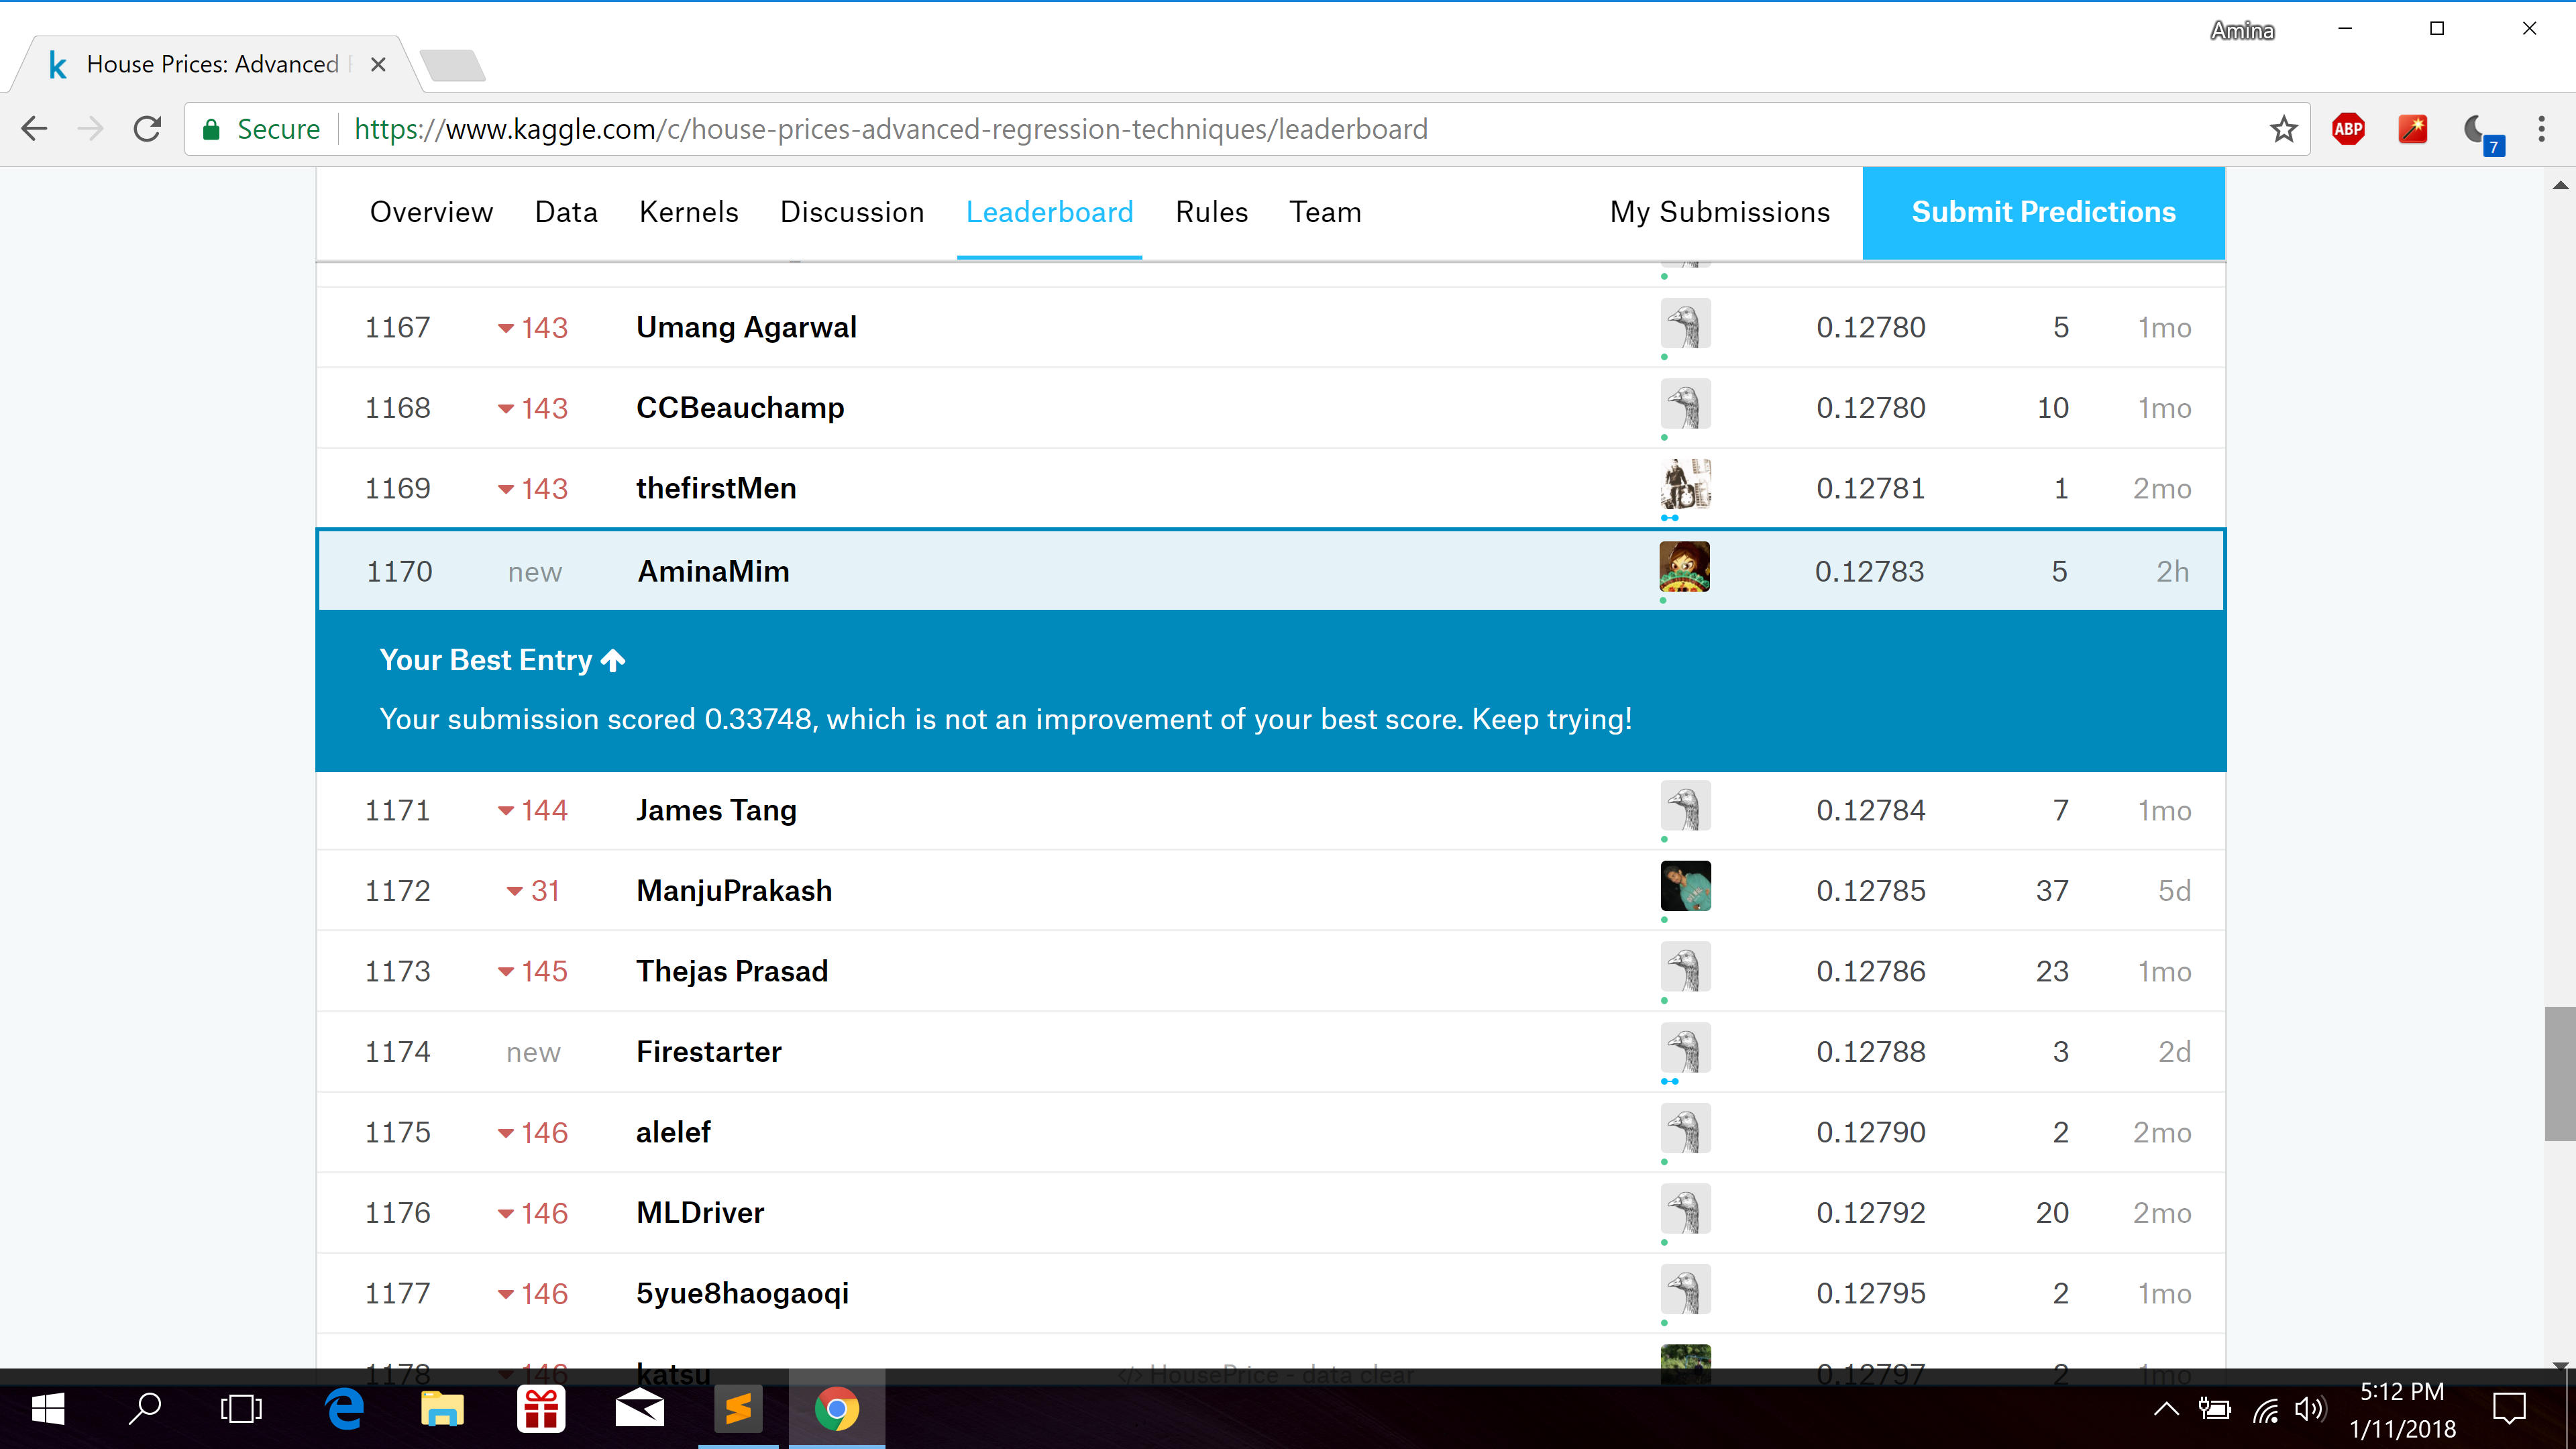

In [106]:
print('Kaggle position : 1170')
from IPython.display import Image
Image('kaggle_sub.PNG')


<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1.05em";>Discussion</span></h1>

<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  <li>Exploratory Data Analysis like distributions and correlation matrix reveals many underlying characteristics of features and knowing them is very important for model building. As we have seen that exploratory data anlysis before model building can make great impact on results.</li>
  <li>Hyper Parameter tuning before building a Artficial Neural Network is kind of must. Hyper Parametrs of neural network greatly affects its performance and capacity.</li>
  <li>Convolutional neural network can be used for 1D numrical datasets too. Although it would not give good performance like Artificial neural network, it's performance is not bad.</li>
  <li>For this particular problem, ANN models and Gradient Boosting models like XGBoost and LightGBM give a satisfying performance.</li>
  <li>Training Artificial or Convolutional neural network need a good amount of computational resources.</li>
</span></ul>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1.05em";>Further Improvement</span></h1>
<ul>
	<li>Using Batch Normalization and Dropout will make the model more regularized.</li>
	<li>We can introduce more new features to increase model's performance.</li>
</ul>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1.05em";>Conclusion</span></h1>

<span  style="font-family: sans-serif; font-size: 1.1em";>Neural network model that we have built up and trained in this problem can be used as pre-trained model and we can observe how our model perform on House price datasets from other city than Ames. 
Applying Convolutional neural network on 1D numerical datasets and fine tuning the model was an great experience. Neural Network models excels at modeling non-linear and complex relationship among features. Neural Network models works best when there is enough trainig data. 
Some of the issues that we faced during building and training Neural Network models are:</span>
<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  <li>Neural network models are **black box** and what's going on inside that box we can't perceive it.</li>
  <li>Training Neural Network models need a good amount of computational resources.</li>
  <li>Tuning Hyper Parameters for Neural Network models is very difficult as there are no definite rule.</li>
  <li>Weights intialization have great effects on model training and its performance.</li>
    </span></ul>

<h1> <span  style="color: #9A5A87; font-family: sans-serif; font-size: 1.05em";>References</span></h1>

<ul><span  style="font-family: sans-serif; font-size: 1.1em";>
  https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
  https://github.com/bhimmetoglu/kaggle_101/tree/master/HousePrices/stacking
  https://www.dataquest.io/blog/kaggle-getting-started/
  https://www.kaggle.com/dgawlik/house-prices-eda
  https://blog.akquinet.de/2017/09/19/predicting-house-prices-on-kaggle-part-i/
  https://www.kaggle.com/isaienkov/1d-convolutional-neural-network-starter/notebook
  https://www.kaggle.com/notaapple/detailed-exploratory-data-analysis-using-r
  https://www.kaggle.com/tannercarbonati/detailed-data-analysis-ensemble-modeling
</span></ul>